In [144]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [145]:
data_tc = np.load('/fastio2/dasha/double_pulse/data_NuTau_1_1_1.npy',mmap_mode='r')
data_tn = np.load('/fastio2/dasha/double_pulse/data_NuTau_2_1_1.npy',mmap_mode='r')
data_mc = np.load('/fastio2/dasha/double_pulse/data_NuMu_1_1_1.npy',mmap_mode='r')
data_mn = np.load('/fastio2/dasha/double_pulse/data_NuMu_2_1_1.npy',mmap_mode='r')
data_ec = np.load('/fastio2/dasha/double_pulse/data_NuE_1_1_1.npy',mmap_mode='r')
data_en = np.load('/fastio2/dasha/double_pulse/data_NuE_2_1_1.npy',mmap_mode='r')
data_eg = np.load('/fastio2/dasha/double_pulse/data_NuE_3_1_1.npy',mmap_mode='r')
data_c = np.load('/fastio2/dasha/double_pulse/data_Corsika_11057_00000_00999.npy',mmap_mode='r')

In [146]:
def GetRates(Name,mask_tc,mask_tn,mask_mc,mask_mn,mask_ec,mask_en,mask_eg,mask_c):
    rate_tc = np.sum(data_tc['weight_val'][mask_tc]) 
    rate_tn = np.sum(data_tn['weight_val'][mask_tn]) 
    rate_mc = np.sum(data_mc['weight_val'][mask_mc]) 
    rate_mn = np.sum(data_mn['weight_val'][mask_mn])
    rate_ec = np.sum(data_ec['weight_val'][mask_ec])
    rate_en = np.sum(data_en['weight_val'][mask_en]) 
    rate_eg = np.sum(data_eg['weight_val'][mask_eg])
    rate_c = np.sum(data_c['weight_val'][mask_c])
    
    rate_tc_err = np.sqrt(np.sum(np.square(data_tc['weight_val'][mask_tc]))) 
    rate_tn_err = np.sqrt(np.sum(np.square(data_tn['weight_val'][mask_tn]))) 
    rate_mc_err = np.sqrt(np.sum(np.square(data_mc['weight_val'][mask_mc])))
    rate_mn_err = np.sqrt(np.sum(np.square(data_mn['weight_val'][mask_mn]))) 
    rate_ec_err = np.sqrt(np.sum(np.square(data_ec['weight_val'][mask_ec])))
    rate_en_err = np.sqrt(np.sum(np.square(data_en['weight_val'][mask_en])))
    rate_eg_err = np.sqrt(np.sum(np.square(data_eg['weight_val'][mask_eg])))
    rate_c_err = np.sqrt(np.sum(np.square(data_c['weight_val'][mask_c])))
   
    print(Name)
    print("TauCC = {0:.3f} +/- {1:.3f}".format(rate_tc,rate_tc_err))
    print("TauNC = {0:.3f} +/- {1:.3f}".format(rate_tn,rate_tn_err))
    print("MuCC =  {0:.3f} +/- {1:.3f}".format(rate_mc,rate_mc_err))
    print("MuNC =  {0:.3f} +/- {1:.3f}".format(rate_mn,rate_mn_err))
    print("ECC =   {0:.3f} +/- {1:.3f}".format(rate_ec,rate_ec_err))
    print("ENC =   {0:.3f} +/- {1:.3f}".format(rate_en,rate_en_err))
    print("EGR =   {0:.3f} +/- {1:.3f}".format(rate_eg,rate_eg_err))

    print("Single = {0:.3f} +/- {1:.3f}".format(rate_ec+rate_eg+rate_en+rate_tn+rate_mn,\
                                                rate_ec_err+rate_eg_err+rate_en_err+rate_tn_err+rate_mn_err))
    print("Double = {0:.3f} +/- {1:.3f}".format(rate_tc,rate_tc_err))
    print("Track =  {0:.3f} +/- {1:.3f}".format(rate_mc,rate_mc_err))
    print("Corsika =  {0:.3f} +/- {1:.3f}".format(rate_c,rate_c_err))

In [147]:
def ROCCurve(data_tc,data_ec,weight_tc,weight_ec,cut_range=[0,1],step=0.01,sign ='more'):
    
    zdata_tc = np.array(list(zip(data_tc,weight_tc)))
    zdata_ec = np.array(list(zip(data_ec,weight_ec)))  
    cuts = np.arange(cut_range[0],cut_range[1],step)
    #print(zdata_tc[:6])
    #print(cuts)
    plot_data = []
    for c in cuts:
        if sign == 'more':
            #print([i[1] for i in zdata_tc if i[0]>=c])
            tp = np.sum([i[1] for i in zdata_tc if i[0]>=c])
            fp = np.sum([i[1] for i in zdata_ec if i[0]>=c])
            tp_err = np.sqrt(np.sum(np.square([i[1] for i in zdata_tc if i[0]>=c])))
            fp_err = np.sqrt(np.sum(np.square([i[1] for i in zdata_ec if i[0]>=c])))
        else:
            tp = np.sum([i[1] for i in zdata_tc if i[0]<=c])
            fp = np.sum([i[1] for i in zdata_ec if i[0]<=c])
            tp_err = np.sqrt(np.sum(np.square([i[1] for i in zdata_tc if i[0]<=c])))
            fp_err = np.sqrt(np.sum(np.square([i[1] for i in zdata_ec if i[0]<=c])))
       
        plot_data.append([c,tp,fp,tp_err,fp_err])
    plot_data = np.array(plot_data)
    return plot_data

In [12]:
def ROCCurve2(data_tc,data_ec,data_tc_2,data_ec_2,weight_tc,weight_ec,cut_range=[0,1],step=0.01,sign ='more'):
    
    zdata_tc = np.array(list(zip(data_tc,data_tc_2,weight_tc)))
    zdata_ec = np.array(list(zip(data_ec,data_ec_2,weight_ec)))  
    cuts = np.arange(cut_range[0],cut_range[1],step)
    #print(zdata_tc[:6])
    #print(cuts)
    plot_data = []
    for c1 in cuts:
        for c2 in cuts:
            if sign == 'more':
                #print([i[1] for i in zdata_tc if i[0]>=c])
                tp = np.sum([i[2] for i in zdata_tc if (i[0]>=c1 and i[1]>=c2)])
                fp = np.sum([i[2] for i in zdata_ec if (i[0]>=c1 and i[1]>=c2)])
                tp_err = np.sqrt(np.sum(np.square([i[2] for i in zdata_tc if (i[0]>=c1 and i[1]>=c2)])))
                fp_err = np.sqrt(np.sum(np.square([i[2] for i in zdata_ec if (i[0]>=c1 and i[1]>=c2)])))
            plot_data.append([[c1,c2],tp,fp,tp_err,fp_err])
    plot_data = np.array(plot_data)
    return plot_data

In [13]:
def Significance(data):
    years = 8
    b= data[:,2]*years
    s= data[:,1]*years
    n0 = b+s
    #s= np.array([(i[1]-i[2])*years if i[2]<i[1] else 0 for i in data])
    print(b[0],n0[0],s[0])
    S= np.array(np.sqrt(2*n0*np.log(1+(s/b).astype('float'))-2*s))
    S1= np.array(s/np.sqrt(b))
    print(s[0],b[0],s[0]/np.sqrt(b[0]),S1[0])
    #print(data.shape,S.shape)
    sig = np.concatenate([data,S.reshape(S.shape[0],1),S1.reshape(S1.shape[0],1)],axis=1)
    return sig

In [14]:
def PlotROCCurve(name, data,lims=[0,5,0,5]):
    fig = plt.figure(figsize=(10, 10),facecolor = "w")
    ax = fig.add_subplot(111)
    ax.set_title(name, fontsize = 14)
    major_ticks_x = np.linspace(lims[0],lims[1], 11)
    major_ticks_y = np.linspace(lims[2],lims[3], 11)
    minor_ticks_x = np.linspace(lims[0],lims[1], 41)
    minor_ticks_y = np.linspace(lims[2],lims[3], 41)
    ax.set_xticks(major_ticks_x)
    ax.set_xticks(minor_ticks_x, minor=True)
    ax.set_yticks(major_ticks_y)
    ax.set_yticks(minor_ticks_y, minor=True)
    ax.set_ylabel("True positive", fontsize = 14)                                                                                                                           
    ax.set_xlabel("False positive", fontsize = 14)                                                   
    plt.errorbar(data[:,2], data[:,1], xerr=data[:,4]/2,yerr=data[:,3]/2)
    ax.set_xlim([lims[0],lims[1]])
    ax.set_ylim([lims[2],lims[3]])
    ax.grid(True,which='both')
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)


In [15]:
def PlotSig(name,data,lims=[0,1,0,20]):
    fig = plt.figure(figsize=(10, 10),facecolor = "w")
    ax = fig.add_subplot(111)
    ax.set_title(name, fontsize = 14)
    major_ticks_x = np.linspace(lims[0],lims[1], 11)
    major_ticks_y = np.linspace(lims[2],lims[3], 11)
    minor_ticks_x = np.linspace(lims[0],lims[1], 41)
    minor_ticks_y = np.linspace(lims[2],lims[3], 41)
    ax.set_xticks(major_ticks_x)
    ax.set_xticks(minor_ticks_x, minor=True)
    ax.set_yticks(major_ticks_y)
    ax.set_yticks(minor_ticks_y, minor=True)
    ax.set_ylabel("Significance", fontsize = 14)                                                                                                                           
    ax.set_xlabel("Cut", fontsize = 14)                                                   
    plt.plot(data[:,0], data[:,-1],label ='sig/sqrt(bg)')
    plt.plot(data[:,0], data[:,-2],label ='lh ratio')
    ax.legend()
    ax.set_xlim([lims[0],lims[1]])
    ax.set_ylim([lims[2],lims[3]])
    ax.grid(True,which='both')
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)

In [148]:
GetRates("Rates after charge cuts Qtot >1000, Qst>400",np.ones(data_tc.shape[0],dtype=bool),np.ones(data_tn.shape[0],dtype=bool),\
         np.ones(data_mc.shape[0],dtype=bool),np.ones(data_mn.shape[0],dtype=bool),np.ones(data_ec.shape[0],dtype=bool),\
         np.ones(data_en.shape[0],dtype=bool),np.ones(data_eg.shape[0],dtype=bool),np.ones(data_c.shape[0],dtype=bool))

Rates after charge cuts Qtot >1000, Qst>400
TauCC = 76.709 +/- 1.186
TauNC = 13.578 +/- 0.469
MuCC =  85.855 +/- 0.800
MuNC =  14.079 +/- 0.349
ECC =   111.417 +/- 0.987
ENC =   13.434 +/- 0.314
EGR =   0.636 +/- 0.069
Single = 153.144 +/- 2.188
Double = 76.709 +/- 1.186
Track =  85.855 +/- 0.800
Corsika =  0.133 +/- 0.003


In [17]:
def Plot(Name,Label,data_tc,data_tn,data_mc,data_mn,data_ec,data_en,data_eg,data_c,xscale='linear',b =200,r =[0,1], loc = 8):
    fig = plt.figure(figsize=(20, 10),facecolor ='w')
    ax = fig.add_subplot(111)
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    ax.set_xscale(xscale)
    ax.set_yscale('log')
    ax.set_title(Name, fontsize = 16)
    ax.text(0.01,0.95,'#NuTauCC '+str(len(data_tc)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.92,'#NuMuCC '+str(len(data_mc)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.89,'#NuECC '+str(len(data_ec)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.86,'#NuTauNC '+str(len(data_tn)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.83,'#NuMuNC '+str(len(data_mn)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.80,'#NuENC '+str(len(data_en)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.77,'#NuEGR '+str(len(data_eg)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.74,'#Corsika '+str(len(data_c)), transform=ax.transAxes, color = "black",fontsize=12)

    ax.set_xlabel(Label, fontsize = 16)                                                              
    ax.set_ylabel("#Events", fontsize = 16)                                                   
    ax.hist(data_tc, bins =b, histtype = 'step',edgecolor ='r', lw =2, range =r, label = "NuTauCC")  
    ax.hist(data_tn, bins =b, histtype = 'step',edgecolor ='r', lw =2, ls ="--", range = r, label = "NuTauNC")  
    ax.hist(data_mc, bins =b, histtype = 'step',edgecolor ='b', lw =2, range = r, label = "NuMuCC")  
    ax.hist(data_mn, bins =b, histtype = 'step',edgecolor ='b', lw =2, ls ="--", range = r, label = "NuMuNC")  
    ax.hist(data_ec, bins =b, histtype = 'step',edgecolor ='g', lw =2, range = r, label = "NuECC")  
    ax.hist(data_en, bins =b, histtype = 'step',edgecolor ='g', lw =2, ls ="--", range = r, label = "NuENC")  
    ax.hist(data_eg, bins =b, histtype = 'step',edgecolor ='g', lw =2, ls =":", range = r, label = "NuEGR")  
    ax.hist(data_c, bins =b, histtype = 'step',edgecolor ='k', lw =2, range = r, label = "Corsika")  
   
    plt.legend(loc=loc)
    plt.show()

In [18]:
def PlotW(Name,Label,data_tc,data_tn,data_mc,data_mn,data_ec,data_en,data_eg,data_c,\
         weight_tc,weight_tn,weight_mc,weight_mn,weight_ec,weight_en,weight_eg,weight_c,\
         xscale='linear',b =200,r =[0,1], loc =8):
    fig = plt.figure(figsize=(20, 10),facecolor ='w')
    ax = fig.add_subplot(111)
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    ax.set_xscale(xscale)
    ax.set_yscale('log')
    ax.set_title(Name, fontsize = 16)
    ax.text(0.01,0.95,'#NuTauCC '+str(len(data_tc)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.92,'#NuMuCC '+str(len(data_mc)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.89,'#NuECC '+str(len(data_ec)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.86,'#NuTauNC '+str(len(data_tn)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.83,'#NuMuNC '+str(len(data_mn)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.80,'#NuENC '+str(len(data_en)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.77,'#NuEGR '+str(len(data_eg)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.74,'#Corsika '+str(len(data_c)), transform=ax.transAxes, color = "black",fontsize=12)

    ax.set_xlabel(Label, fontsize = 16)                                                              
    ax.set_ylabel("#Events", fontsize = 16)                                                   
    ax.hist(data_tc, bins =b, weights = weight_tc, histtype = 'step',edgecolor ='r', lw =2, range =r, label = "NuTauCC")  
    ax.hist(data_tn, bins =b, weights = weight_tn, histtype = 'step',edgecolor ='r', lw =2, ls ="--", range = r, label = "NuTauNC")  
    ax.hist(data_mc, bins =b, weights = weight_mc, histtype = 'step',edgecolor ='b', lw =2, range = r, label = "NuMuCC")  
    ax.hist(data_mn, bins =b, weights = weight_mn, histtype = 'step',edgecolor ='b', lw =2, ls ="--", range = r, label = "NuMuNC")  
    ax.hist(data_ec, bins =b, weights = weight_ec, histtype = 'step',edgecolor ='g', lw =2, range = r, label = "NuECC")  
    ax.hist(data_en, bins =b, weights = weight_en, histtype = 'step',edgecolor ='g', lw =2, ls ="--", range = r, label = "NuENC")  
    ax.hist(data_eg, bins =b, weights = weight_eg, histtype = 'step',edgecolor ='g', lw =2, ls =":",  range = r, label = "NuEGR")  
    ax.hist(data_c, bins =b, weights = weight_c, histtype = 'step',edgecolor ='k', lw =2, range = r, label = "Corsika")  

    plt.legend(loc=loc)
    plt.show()

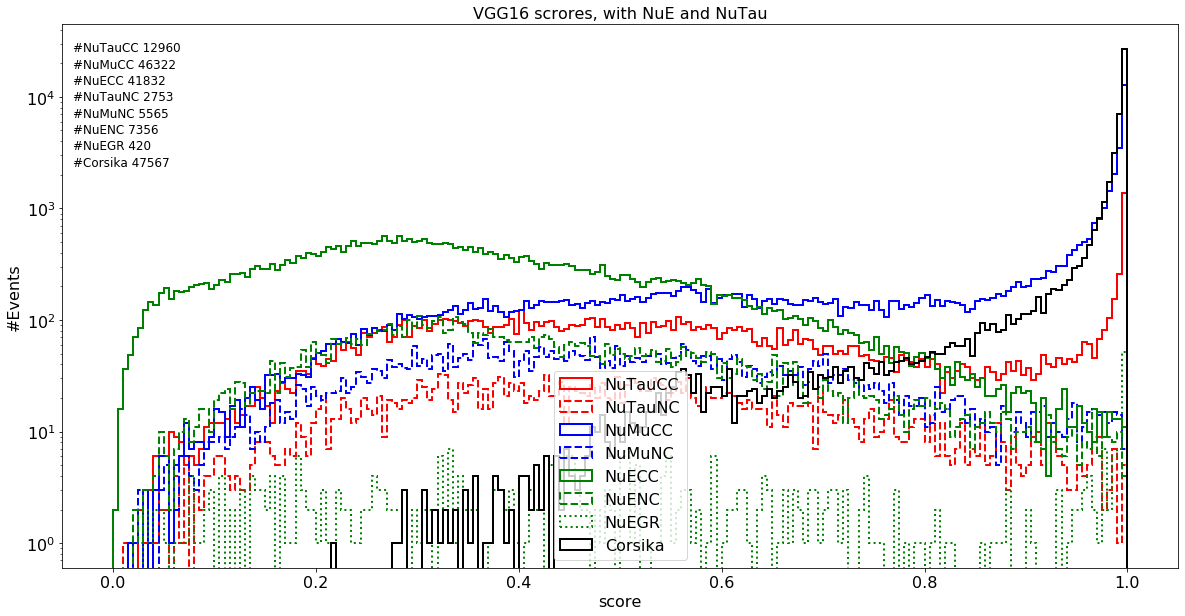

In [149]:
Plot("VGG16 scrores, with NuE and NuTau", "score", data_tc['preds']['pred_n1'],data_tn['preds']['pred_n1'],data_mc['preds']['pred_n1'],\
     data_mn['preds']['pred_n1'],data_ec['preds']['pred_n1'],data_en['preds']['pred_n1'],data_eg['preds']['pred_n1'],data_c['preds']['pred_n1'])

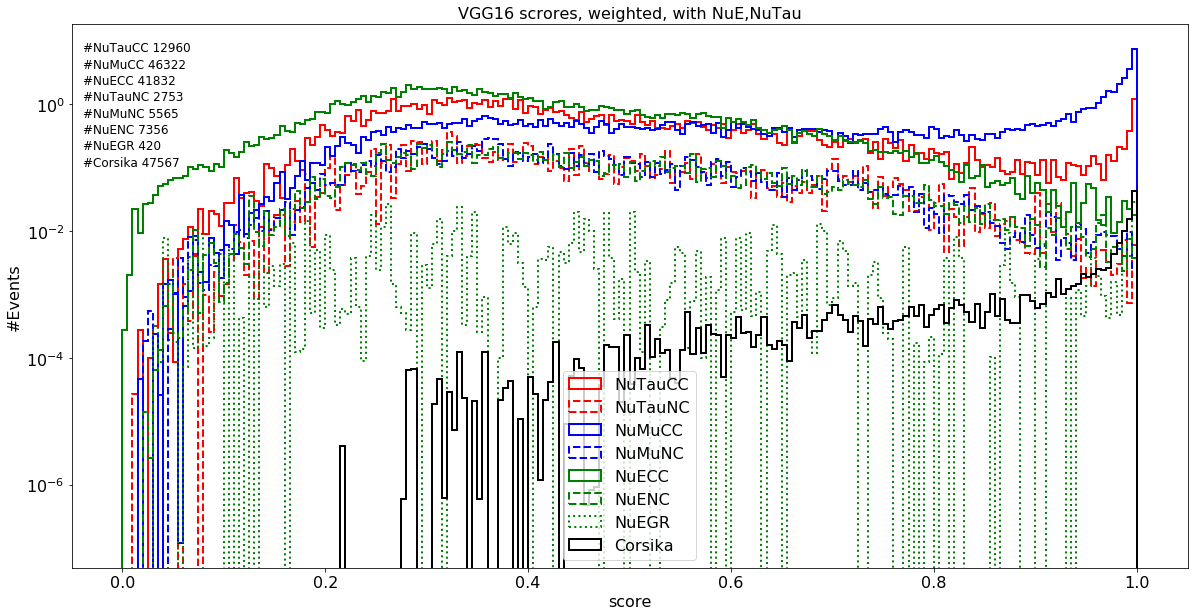

In [150]:
PlotW("VGG16 scrores, weighted, with NuE,NuTau", "score", data_tc['preds']['pred_n1'],data_tn['preds']['pred_n1'],data_mc['preds']['pred_n1'],\
      data_mn['preds']['pred_n1'],data_ec['preds']['pred_n1'],data_en['preds']['pred_n1'],data_eg['preds']['pred_n1'],\
      data_c['preds']['pred_n1'],data_tc['weight_val'],data_tn['weight_val'],data_mc['weight_val'],data_mn['weight_val'],\
      data_ec['weight_val'],data_en['weight_val'],data_eg['weight_val'],data_c['weight_val'])

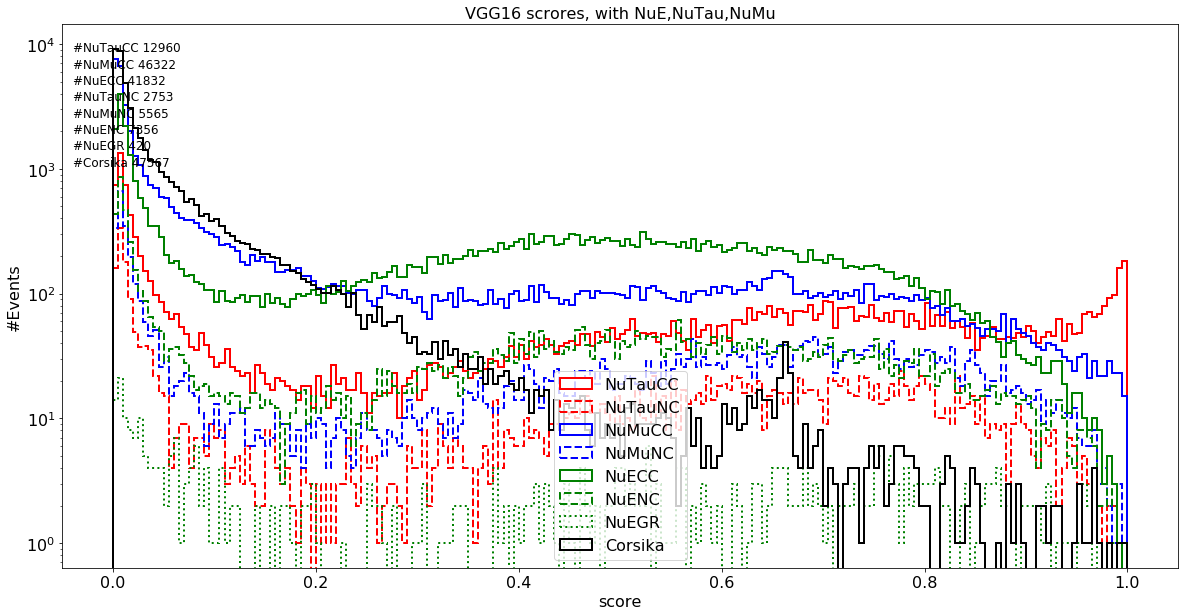

In [58]:
Plot("VGG16 scrores, with NuE,NuTau,NuMu", "score", data_tc['preds']['pred_n2'],data_tn['preds']['pred_n2'],data_mc['preds']['pred_n2'],\
     data_mn['preds']['pred_n2'],data_ec['preds']['pred_n2'],data_en['preds']['pred_n2'],data_eg['preds']['pred_n2'],data_c['preds']['pred_n2'])

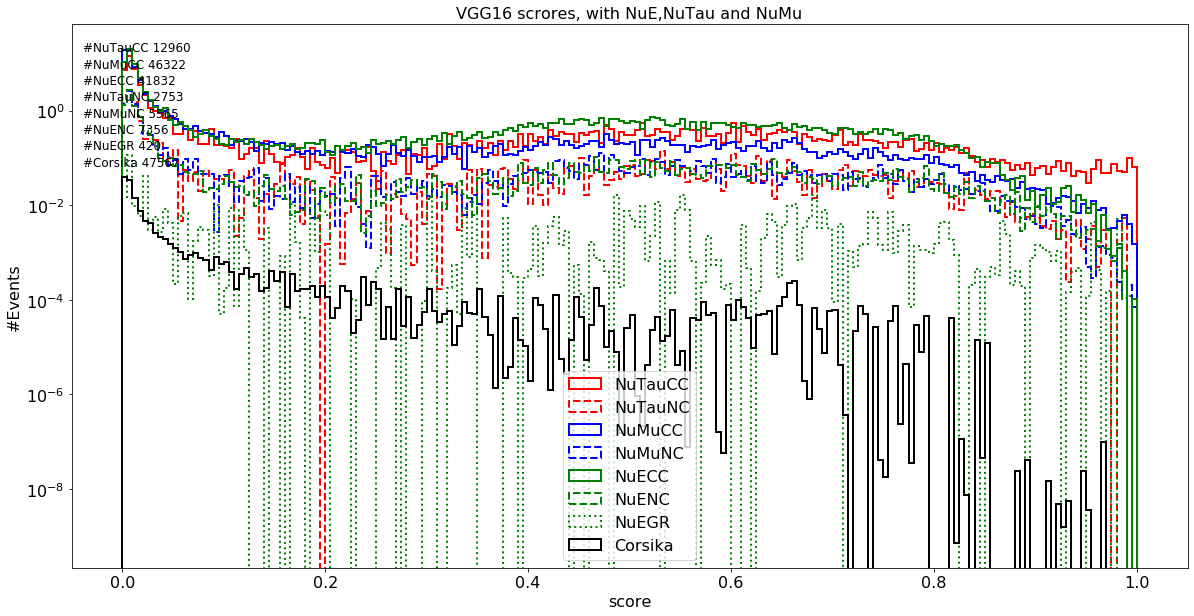

In [151]:
PlotW("VGG16 scrores, with NuE,NuTau and NuMu", "score", data_tc['preds']['pred_n2'],data_tn['preds']['pred_n2'],\
      data_mc['preds']['pred_n2'],data_mn['preds']['pred_n2'],data_ec['preds']['pred_n2'],data_en['preds']['pred_n2'],\
      data_eg['preds']['pred_n2'],data_c['preds']['pred_n2'],data_tc['weight_val'],data_tn['weight_val'],\
      data_mc['weight_val'],data_mn['weight_val'],data_ec['weight_val'],data_en['weight_val'],data_eg['weight_val'],data_c['weight_val'])

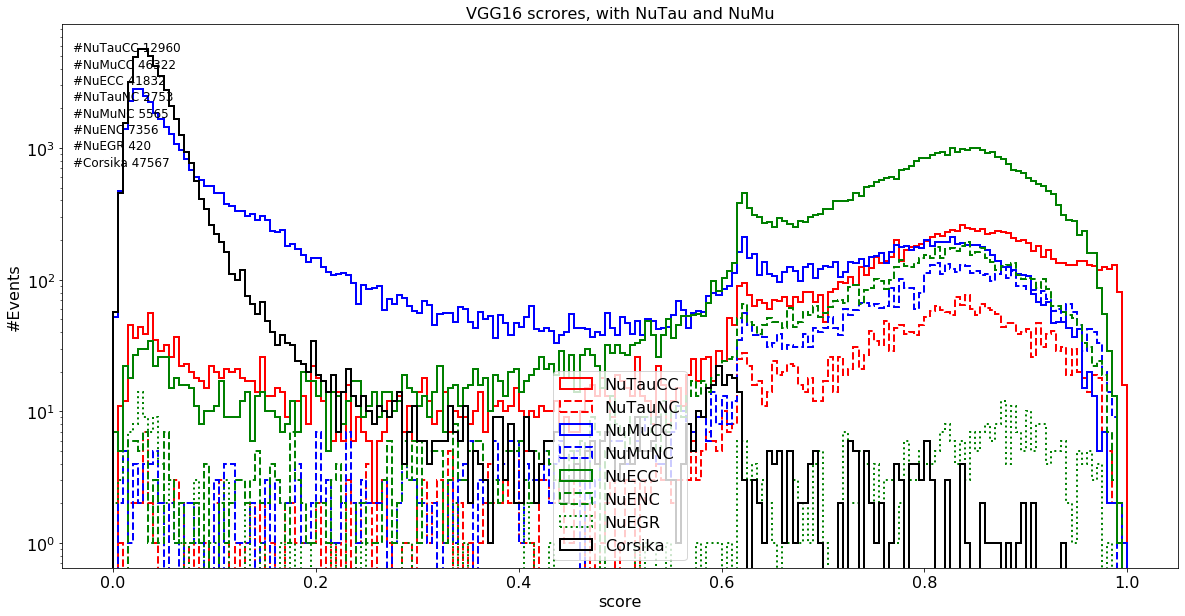

In [152]:
Plot("VGG16 scrores, with NuTau and NuMu", "score", data_tc['preds']['pred_n3'][:,0],data_tn['preds']['pred_n3'][:,0],\
      data_mc['preds']['pred_n3'][:,0],data_mn['preds']['pred_n3'][:,0],data_ec['preds']['pred_n3'][:,0],data_en['preds']['pred_n3'][:,0],\
      data_eg['preds']['pred_n3'][:,0],data_c['preds']['pred_n3'][:,0])

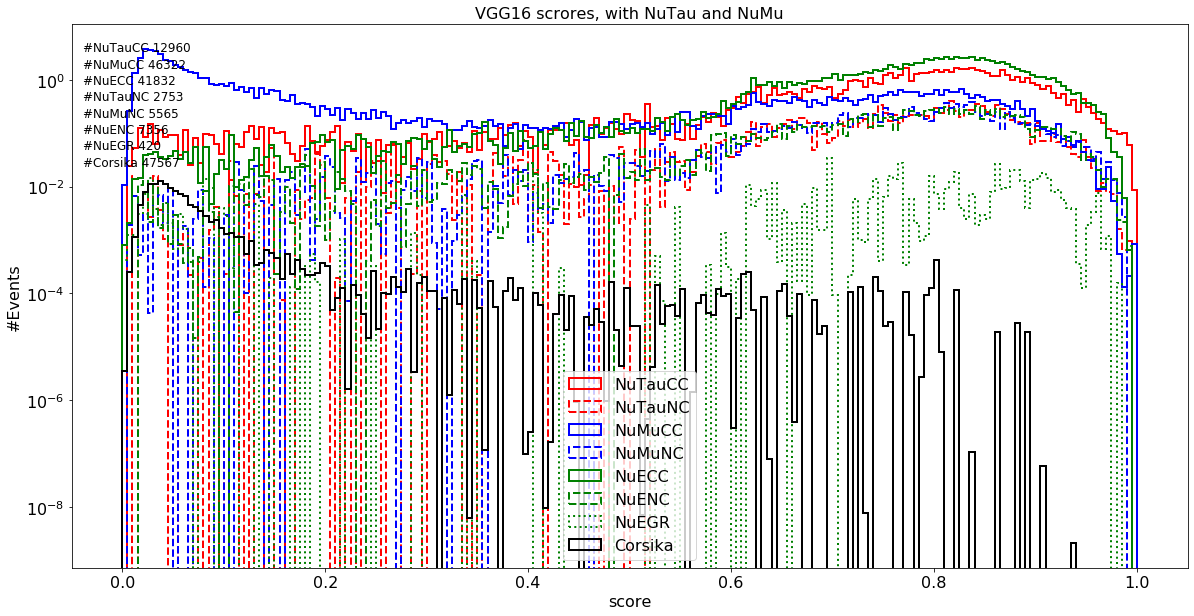

In [153]:
PlotW("VGG16 scrores, with NuTau and NuMu", "score", data_tc['preds']['pred_n3'][:,0],data_tn['preds']['pred_n3'][:,0],\
      data_mc['preds']['pred_n3'][:,0],data_mn['preds']['pred_n3'][:,0],data_ec['preds']['pred_n3'][:,0],data_en['preds']['pred_n3'][:,0],\
      data_eg['preds']['pred_n3'][:,0],data_c['preds']['pred_n3'][:,0],data_tc['weight_val'],data_tn['weight_val'],\
      data_mc['weight_val'],data_mn['weight_val'],data_ec['weight_val'],data_en['weight_val'],data_eg['weight_val'],data_c['weight_val'])

In [249]:
#Network1 score cut
n1_cut = 0.97
n1_mask_tc= data_tc['preds']['pred_n1'] >= n1_cut
n1_mask_tn= data_tn['preds']['pred_n1'] >= n1_cut
n1_mask_mc= data_mc['preds']['pred_n1'] >= n1_cut
n1_mask_mn= data_mn['preds']['pred_n1'] >= n1_cut
n1_mask_ec= data_ec['preds']['pred_n1'] >= n1_cut
n1_mask_en= data_en['preds']['pred_n1'] >= n1_cut
n1_mask_eg= data_eg['preds']['pred_n1'] >= n1_cut
n1_mask_c= data_c['preds']['pred_n1'] >= n1_cut

In [250]:
GetRates("Rates after NET1 Score Cut of {0}".format(n1_cut),n1_mask_tc,n1_mask_tn,n1_mask_mc,n1_mask_mn,n1_mask_ec,n1_mask_en,n1_mask_eg,n1_mask_c)

Rates after NET1 Score Cut of 0.97
TauCC = 2.255 +/- 0.110
TauNC = 0.022 +/- 0.007
MuCC =  18.645 +/- 0.288
MuNC =  0.038 +/- 0.008
ECC =   0.126 +/- 0.022
ENC =   0.028 +/- 0.006
EGR =   0.039 +/- 0.008
Single = 0.253 +/- 0.052
Double = 2.255 +/- 0.110
Track =  18.645 +/- 0.288
Corsika =  0.080 +/- 0.002


In [229]:
#Network1 score cut
n2_cut = 0.90
n2_mask_tc= data_tc['preds']['pred_n2'] >= n2_cut
n2_mask_tn= data_tn['preds']['pred_n2'] >= n2_cut
n2_mask_mc= data_mc['preds']['pred_n2'] >= n2_cut
n2_mask_mn= data_mn['preds']['pred_n2'] >= n2_cut
n2_mask_ec= data_ec['preds']['pred_n2'] >= n2_cut
n2_mask_en= data_en['preds']['pred_n2'] >= n2_cut
n2_mask_eg= data_eg['preds']['pred_n2'] >= n2_cut
n2_mask_c= data_c['preds']['pred_n2'] >= n2_cut

In [230]:
GetRates("Rates after NET2 Score Cut of {0}".format(n2_cut),n2_mask_tc,n2_mask_tn,n2_mask_mc,n2_mask_mn,n2_mask_ec,n2_mask_en,n2_mask_eg,n2_mask_c)

Rates after NET2 Score Cut of 0.9
TauCC = 1.210 +/- 0.055
TauNC = 0.048 +/- 0.009
MuCC =  0.197 +/- 0.016
MuNC =  0.057 +/- 0.008
ECC =   0.187 +/- 0.018
ENC =   0.064 +/- 0.010
EGR =   0.017 +/- 0.006
Single = 0.373 +/- 0.051
Double = 1.210 +/- 0.055
Track =  0.197 +/- 0.016
Corsika =  0.000 +/- 0.000


In [247]:
#Network1 score cut
n3_cut = 0.2
n3_mask_tc= data_tc['preds']['pred_n3'][:,0]  <= n3_cut
n3_mask_tn= data_tn['preds']['pred_n3'][:,0] <= n3_cut
n3_mask_mc= data_mc['preds']['pred_n3'][:,0] <= n3_cut
n3_mask_mn= data_mn['preds']['pred_n3'][:,0] <= n3_cut
n3_mask_ec= data_ec['preds']['pred_n3'][:,0] <= n3_cut
n3_mask_en= data_en['preds']['pred_n3'][:,0] <= n3_cut
n3_mask_eg= data_eg['preds']['pred_n3'][:,0] <= n3_cut
n3_mask_c= data_c['preds']['pred_n3'][:,0] <= n3_cut

In [248]:
GetRates("Rates after NET3 Score Cut of {0}".format(n3_cut),n3_mask_tc,n3_mask_tn,n3_mask_mc,n3_mask_mn,n3_mask_ec,n3_mask_en,n3_mask_eg,n3_mask_c)

Rates after NET3 Score Cut of 0.2
TauCC = 3.015 +/- 0.225
TauNC = 0.280 +/- 0.078
MuCC =  45.537 +/- 0.537
MuNC =  0.252 +/- 0.053
ECC =   1.323 +/- 0.096
ENC =   0.274 +/- 0.057
EGR =   0.085 +/- 0.018
Single = 2.214 +/- 0.303
Double = 3.015 +/- 0.225
Track =  45.537 +/- 0.537
Corsika =  0.124 +/- 0.002


In [233]:
mask_tc = n1_mask_tc & n3_mask_tc
mask_tn = n1_mask_tn & n3_mask_tn
mask_mc = n1_mask_mc & n3_mask_mc
mask_mn = n1_mask_mn & n3_mask_mn
mask_ec = n1_mask_ec & n3_mask_ec
mask_en = n1_mask_en & n3_mask_en
mask_eg = n1_mask_eg & n3_mask_eg
mask_c = n1_mask_c & n3_mask_c

In [234]:
GetRates("Rates after Net1 and Net3",mask_tc,mask_tn,mask_mc,mask_mn,mask_ec,mask_en,mask_eg,mask_c)

Rates after Net1 and Net3
TauCC = 0.938 +/- 0.051
TauNC = 0.013 +/- 0.006
MuCC =  0.051 +/- 0.019
MuNC =  0.009 +/- 0.002
ECC =   0.043 +/- 0.012
ENC =   0.018 +/- 0.005
EGR =   0.000 +/- 0.000
Single = 0.084 +/- 0.025
Double = 0.938 +/- 0.051
Track =  0.051 +/- 0.019
Corsika =  0.000 +/- 0.000


/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


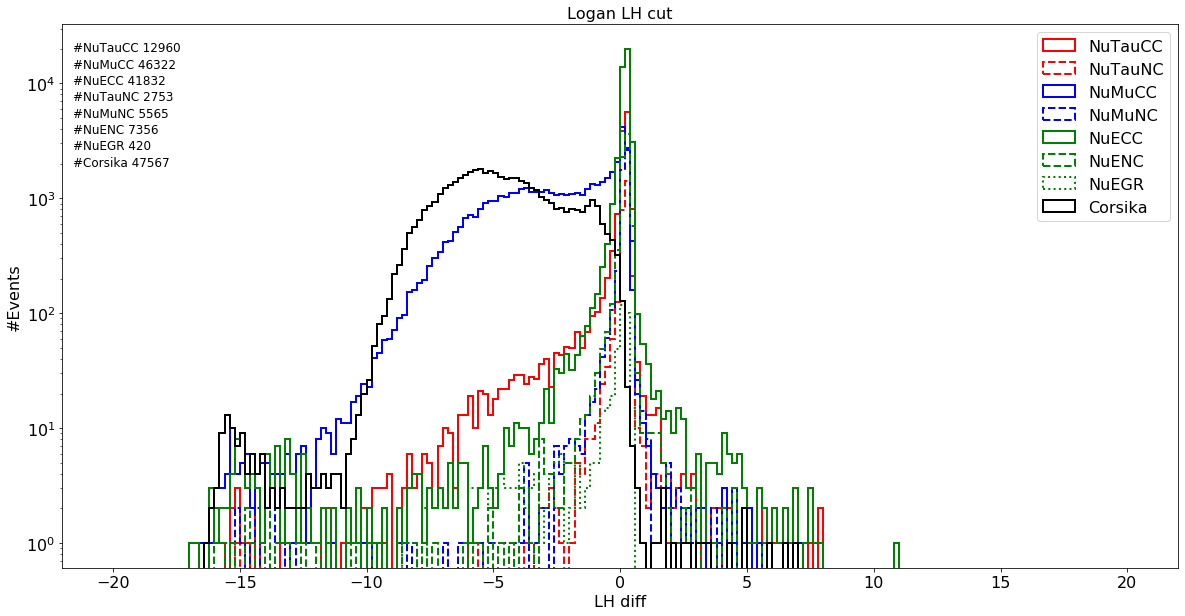

In [243]:
Plot("Logan LH cut", "LH diff", data_tc['logan_veto']["SPE_rlogl"]-data_tc['logan_veto']["Cascade_rlogl"],\
    data_tn['logan_veto']["SPE_rlogl"]-data_tn['logan_veto']["Cascade_rlogl"],\
    data_mc['logan_veto']["SPE_rlogl"]-data_mc['logan_veto']["Cascade_rlogl"],\
    data_mn['logan_veto']["SPE_rlogl"]-data_mn['logan_veto']["Cascade_rlogl"],\
    data_ec['logan_veto']["SPE_rlogl"]-data_ec['logan_veto']["Cascade_rlogl"],\
    data_en['logan_veto']["SPE_rlogl"]-data_en['logan_veto']["Cascade_rlogl"],\
    data_eg['logan_veto']["SPE_rlogl"]-data_eg['logan_veto']["Cascade_rlogl"],\
    data_c['logan_veto']["SPE_rlogl"]-data_c['logan_veto']["Cascade_rlogl"],r=[-20,20],loc=1)

In [254]:
#Logan's LH cut
lcut = -0.05
lmask_tc = (data_tc['logan_veto']["SPE_rlogl"]-data_tc['logan_veto']["Cascade_rlogl"])>lcut
lmask_tn = (data_tn['logan_veto']["SPE_rlogl"]-data_tn['logan_veto']["Cascade_rlogl"])>lcut
lmask_mc = (data_mc['logan_veto']["SPE_rlogl"]-data_mc['logan_veto']["Cascade_rlogl"])>lcut
lmask_mn = (data_mn['logan_veto']["SPE_rlogl"]-data_mn['logan_veto']["Cascade_rlogl"])>lcut
lmask_ec = (data_ec['logan_veto']["SPE_rlogl"]-data_ec['logan_veto']["Cascade_rlogl"])>lcut
lmask_en = (data_en['logan_veto']["SPE_rlogl"]-data_en['logan_veto']["Cascade_rlogl"])>lcut
lmask_eg = (data_eg['logan_veto']["SPE_rlogl"]-data_eg['logan_veto']["Cascade_rlogl"])>lcut
lmask_c = (data_c['logan_veto']["SPE_rlogl"]-data_c['logan_veto']["Cascade_rlogl"])>lcut

/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [255]:
mask_tc = n1_mask_tc & n3_mask_tc & lmask_tc
mask_tn = n1_mask_tn & n3_mask_tn & lmask_tn
mask_mc = n1_mask_mc & n3_mask_mc & lmask_mc
mask_mn = n1_mask_mn & n3_mask_mn & lmask_mn
mask_ec = n1_mask_ec & n3_mask_ec & lmask_ec
mask_en = n1_mask_en & n3_mask_en & lmask_en
mask_eg = n1_mask_eg & n3_mask_eg & lmask_eg
mask_c = n1_mask_c & n3_mask_c & lmask_c

In [256]:
GetRates("Rates after Net1 and Net3",mask_tc,mask_tn,mask_mc,mask_mn,mask_ec,mask_en,mask_eg,mask_c)

Rates after Net1 and Net3
TauCC = 0.113 +/- 0.027
TauNC = 0.000 +/- 0.000
MuCC =  0.838 +/- 0.068
MuNC =  0.000 +/- 0.000
ECC =   0.012 +/- 0.008
ENC =   0.000 +/- 0.000
EGR =   0.001 +/- 0.001
Single = 0.013 +/- 0.009
Double = 0.113 +/- 0.027
Track =  0.838 +/- 0.068
Corsika =  0.000 +/- 0.000


In [183]:
data_n1_s = np.concatenate((data_ec['preds']['pred_n1'], data_tn['preds']['pred_n1'],data_en['preds']['pred_n1'],data_mn['preds']['pred_n1'],data_eg['preds']['pred_n1']), axis=0)
data_n1_t = np.concatenate((data_mc['preds']['pred_n1'],data_c['preds']['pred_n1']), axis=0)
data_n1_d = data_tc['preds']['pred_n1']
data_n2_s = np.concatenate((data_ec['preds']['pred_n2'], data_tn['preds']['pred_n2'],data_en['preds']['pred_n2'],data_mn['preds']['pred_n2'],data_eg['preds']['pred_n2']), axis=0)
data_n2_t = np.concatenate((data_mc['preds']['pred_n2'],data_c['preds']['pred_n2']), axis=0)
data_n2_d = data_tc['preds']['pred_n2']
data_n3_s = np.concatenate((data_ec['preds']['pred_n3'][:,0], data_tn['preds']['pred_n3'][:,0],data_en['preds']['pred_n3'][:,0],data_mn['preds']['pred_n3'][:,0],data_eg['preds']['pred_n3'][:,0]), axis=0)
data_n3_t = np.concatenate((data_mc['preds']['pred_n3'][:,0],data_c['preds']['pred_n3'][:,0]), axis=0)
data_n3_d = data_tc['preds']['pred_n3'][:,0]

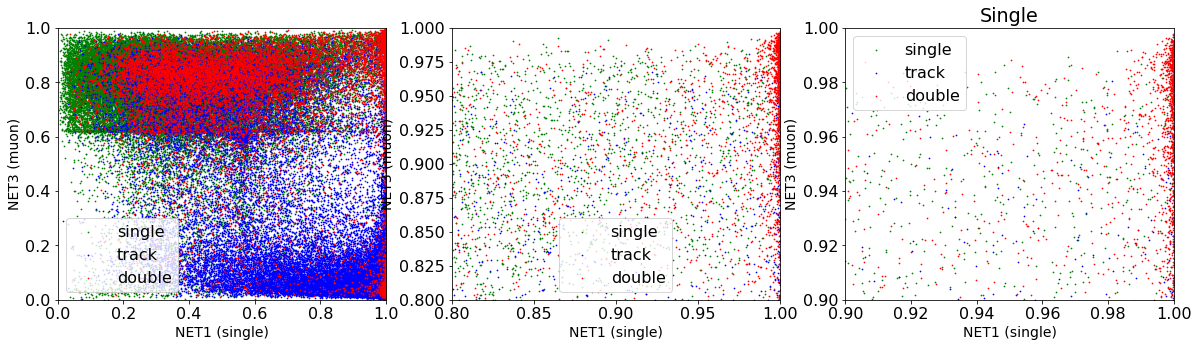

In [196]:
l1 = [0.,1]
l2 = [0.8,1]
l3 = [0.9,1]
fig, ax = plt.subplots(nrows=1, ncols=3,sharex = True,sharey=True, figsize=(20,5))
plt.title('Scores', fontdict={'fontsize': 14, 'fontweight': 'medium'})

plt.subplot(1,3,1)
ax = plt.gca()
ax.set_xlim(l1)
ax.set_ylim(l1)
plt.scatter(data_n1_s,data_n3_s, c = 'g', s =0.5,label ='single')
plt.scatter(data_n1_t,data_n3_t, c = 'b', s =0.5,label ='track')
plt.scatter(data_n1_d,data_n3_d, c = 'r', s =0.5,label ='double')
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.legend()

plt.subplot(1,3,2)
ax = plt.gca()
ax.set_xlim(l2)
ax.set_ylim(l2)
plt.scatter(data_n1_s,data_n3_s, c = 'g', s =0.5,label ='single')
plt.scatter(data_n1_t,data_n3_t, c = 'b', s =0.5,label ='track')
plt.scatter(data_n1_d,data_n3_d, c = 'r', s =0.5,label ='double')
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.legend()

plt.subplot(1,3,3)
ax = plt.gca()
ax.set_xlim(l3)
ax.set_ylim(l3)
ax.set_title('Single')
plt.scatter(data_n1_s,data_n3_s, c = 'g', s =0.5,label ='single')
plt.scatter(data_n1_t,data_n3_t, c = 'b', s =0.5,label ='track')
plt.scatter(data_n1_d,data_n3_d, c = 'r', s =0.5,label ='double')
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.legend()

plt.show()

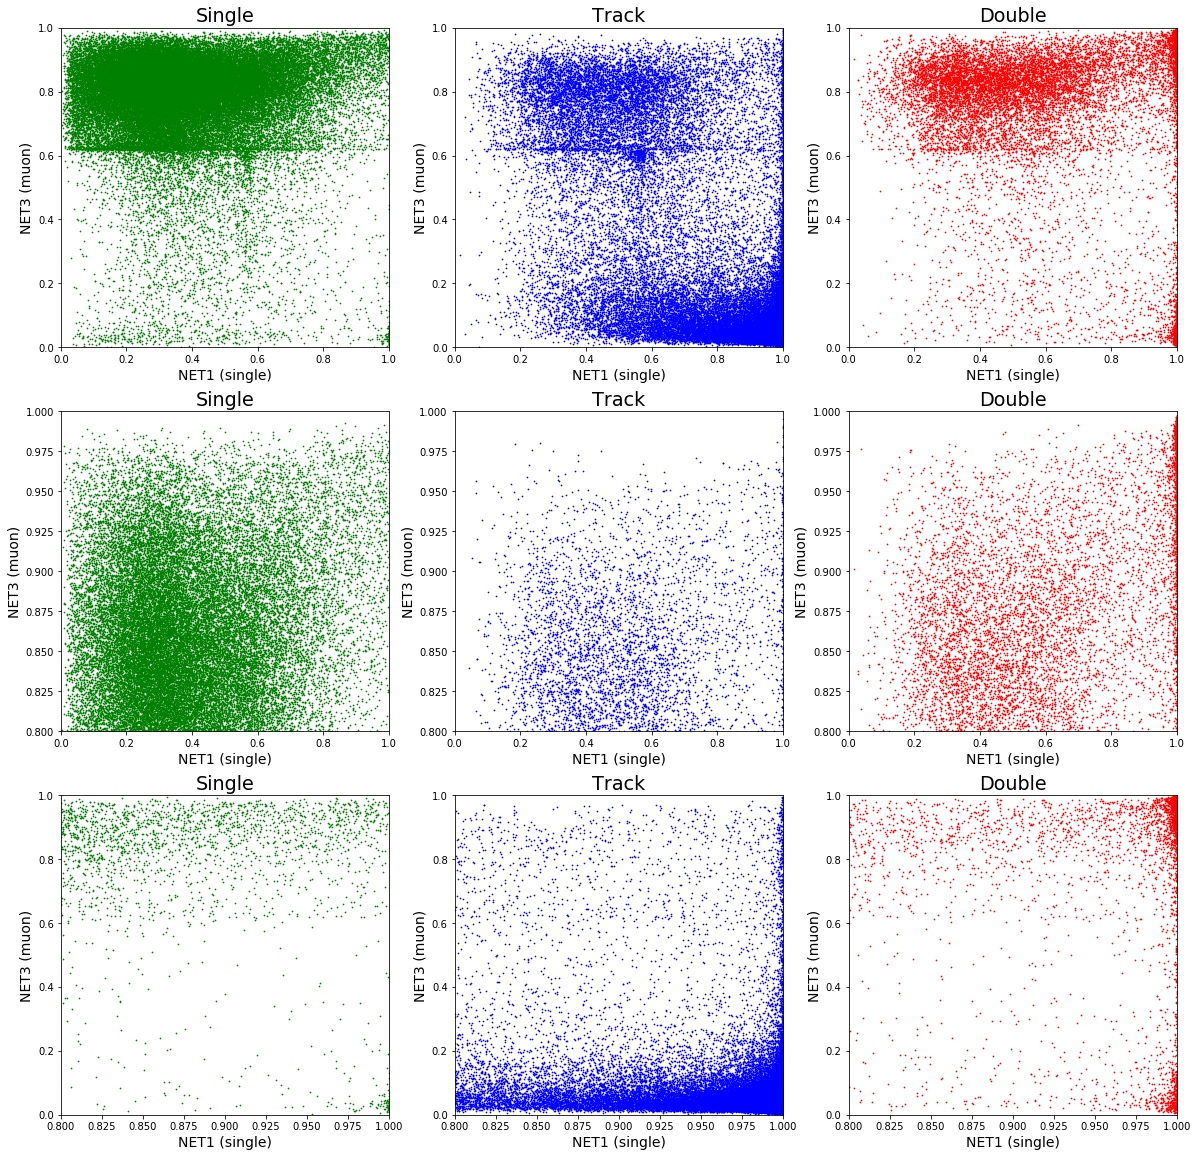

In [207]:
l1 = [0.,1]
l2 = [0.8,1]
l3 = [0.8,1]
fig, ax = plt.subplots(nrows=3, ncols=3,sharex = True,sharey=True, figsize=(20,20))
plt.title('Qst/Distance dist', fontdict={'fontsize': 14, 'fontweight': 'medium'})

plt.subplot(3,3,1)
ax = plt.gca()
ax.set_xlim(l1)
ax.set_ylim(l1)
ax.set_title('Single')
plt.scatter(data_n1_s,data_n3_s, c = 'g', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_s)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,2)
ax = plt.gca()
ax.set_xlim(l1)
ax.set_ylim(l1)
ax.set_title('Track')
plt.scatter(data_n1_t,data_n3_t, c = 'b', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_t)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,3)
ax = plt.gca()
ax.set_xlim(l1)
ax.set_ylim(l1)
ax.set_title('Double')
plt.scatter(data_n1_d,data_n3_d, c = 'r', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_d)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,4)
ax = plt.gca()
ax.set_xlim(l1)
ax.set_ylim(l2)
ax.set_title('Single')
plt.scatter(data_n1_s,data_n3_s, c = 'g', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_s)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,5)
ax = plt.gca()
ax.set_xlim(l1)
ax.set_ylim(l2)
ax.set_title('Track')
plt.scatter(data_n1_t,data_n3_t, c = 'b', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_t)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,6)
ax = plt.gca()
ax.set_xlim(l1)
ax.set_ylim(l2)
ax.set_title('Double')
plt.scatter(data_n1_d,data_n3_d, c = 'r', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_d)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,7)
ax = plt.gca()
ax.set_xlim(l2)
ax.set_ylim(l1)
ax.set_title('Single')
plt.scatter(data_n1_s,data_n3_s, c = 'g', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_s)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,8)
ax = plt.gca()
ax.set_xlim(l2)
ax.set_ylim(l1)
ax.set_title('Track')
plt.scatter(data_n1_t,data_n3_t, c = 'b', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_t)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,9)
ax = plt.gca()
ax.set_xlim(l2)
ax.set_ylim(l1)
ax.set_title('Double')
plt.scatter(data_n1_d,data_n3_d, c = 'r', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_d)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.show()

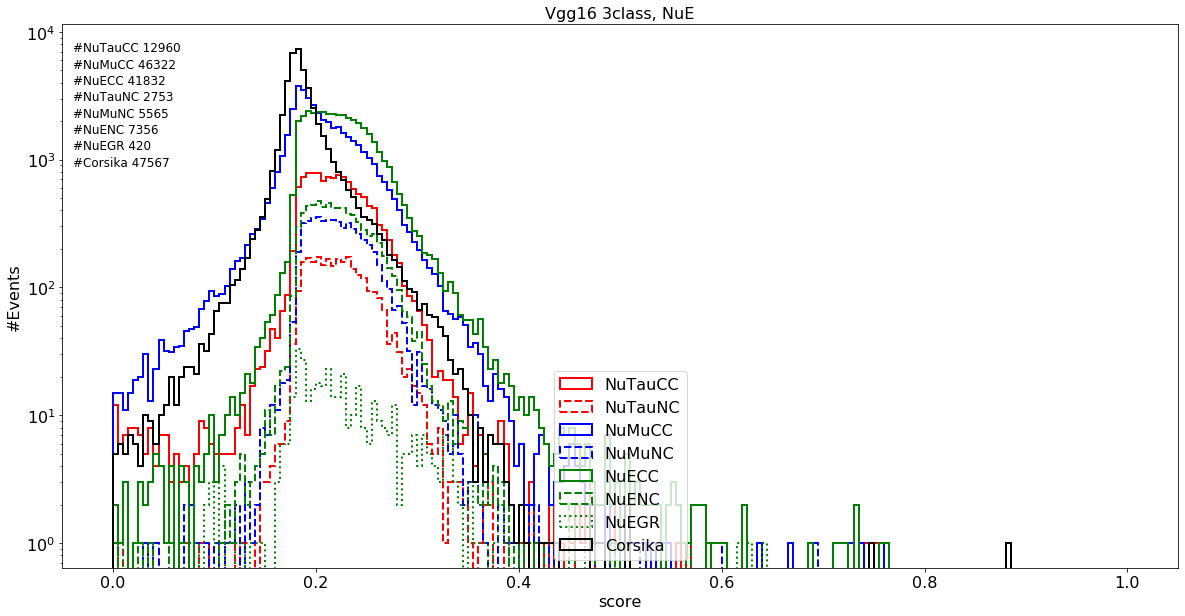

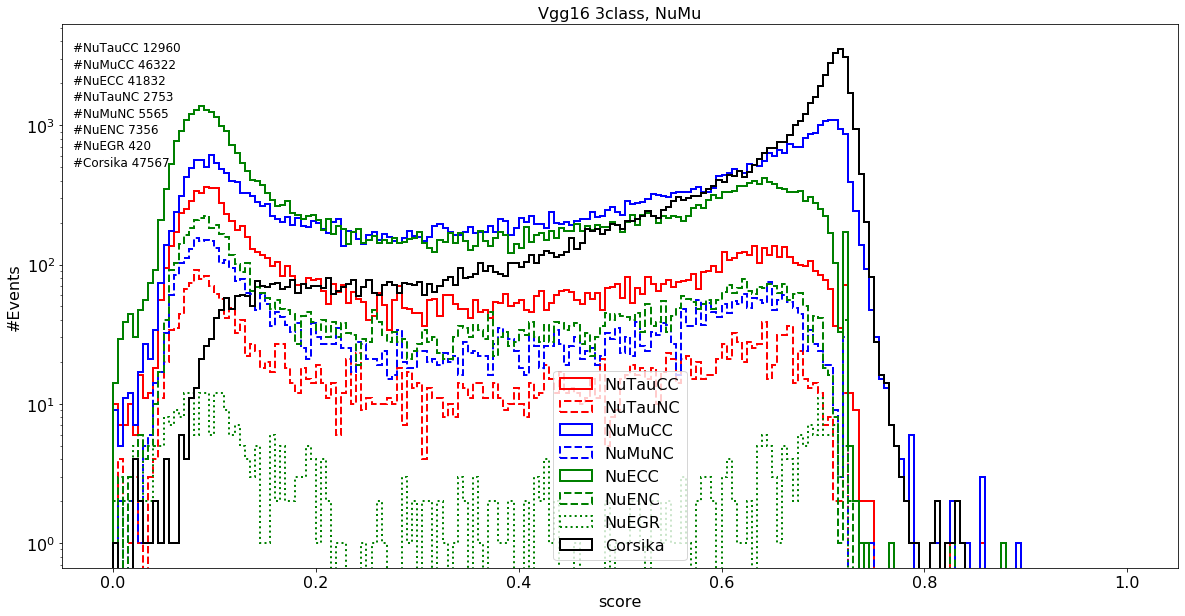

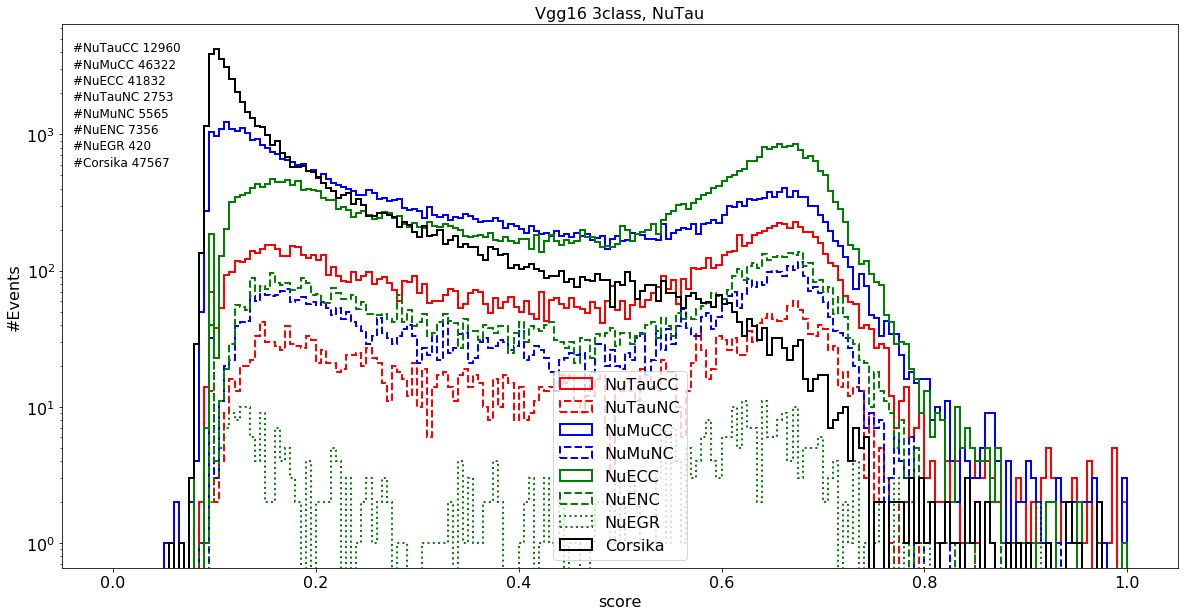

In [159]:
Plot("Vgg16 3class, NuE", "score", data_tc['preds']['pred_n4'][:,0],data_tn['preds']['pred_n4'][:,0],\
     data_mc['preds']['pred_n4'][:,0],data_mn['preds']['pred_n4'][:,0],data_ec['preds']['pred_n4'][:,0],\
     data_en['preds']['pred_n4'][:,0],data_eg['preds']['pred_n4'][:,0],data_c['preds']['pred_n4'][:,0])
Plot("Vgg16 3class, NuMu", "score", data_tc['preds']['pred_n4'][:,1],data_tn['preds']['pred_n4'][:,1],\
     data_mc['preds']['pred_n4'][:,1],data_mn['preds']['pred_n4'][:,1],data_ec['preds']['pred_n4'][:,1],\
     data_en['preds']['pred_n4'][:,1],data_eg['preds']['pred_n4'][:,1],data_c['preds']['pred_n4'][:,1])
Plot("Vgg16 3class, NuTau", "score", data_tc['preds']['pred_n4'][:,2],data_tn['preds']['pred_n4'][:,2],\
     data_mc['preds']['pred_n4'][:,2],data_mn['preds']['pred_n4'][:,2],data_ec['preds']['pred_n4'][:,2],\
     data_en['preds']['pred_n4'][:,2],data_eg['preds']['pred_n4'][:,2],data_c['preds']['pred_n4'][:,2])

/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


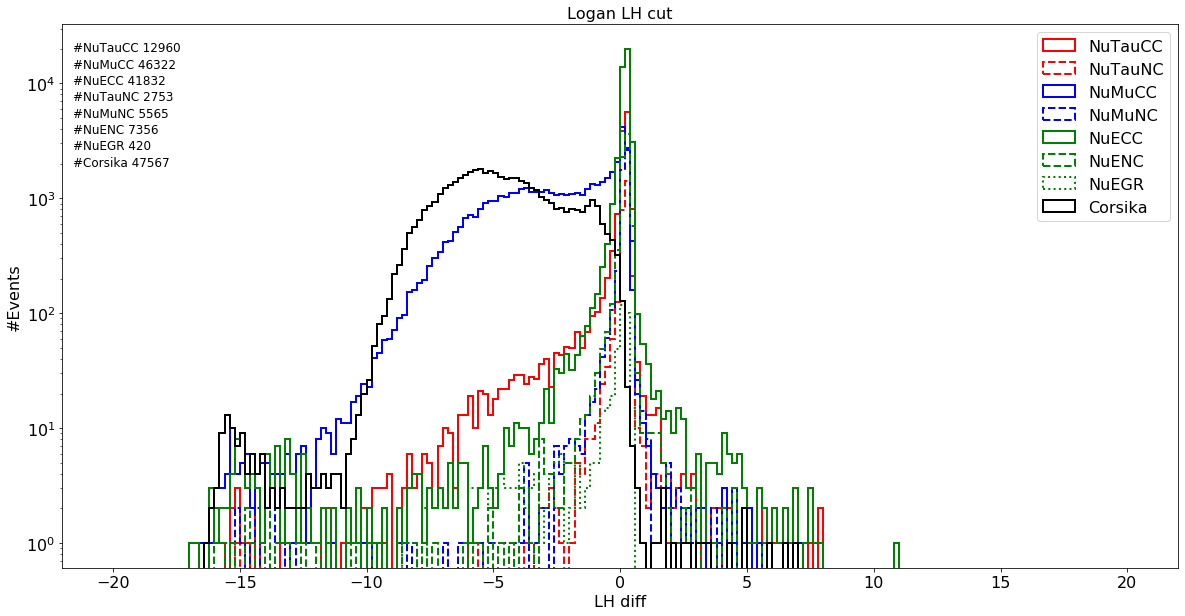

In [154]:
Plot("Logan LH cut", "LH diff", data_tc['logan_veto']["SPE_rlogl"]-data_tc['logan_veto']["Cascade_rlogl"],\
    data_tn['logan_veto']["SPE_rlogl"]-data_tn['logan_veto']["Cascade_rlogl"],\
    data_mc['logan_veto']["SPE_rlogl"]-data_mc['logan_veto']["Cascade_rlogl"],\
    data_mn['logan_veto']["SPE_rlogl"]-data_mn['logan_veto']["Cascade_rlogl"],\
    data_ec['logan_veto']["SPE_rlogl"]-data_ec['logan_veto']["Cascade_rlogl"],\
    data_en['logan_veto']["SPE_rlogl"]-data_en['logan_veto']["Cascade_rlogl"],\
    data_eg['logan_veto']["SPE_rlogl"]-data_eg['logan_veto']["Cascade_rlogl"],\
    data_c['logan_veto']["SPE_rlogl"]-data_c['logan_veto']["Cascade_rlogl"],r=[-20,20],loc=1)

In [155]:
#Logan's LH cut
lcut = 0.1
lmask_tc = (data_tc['logan_veto']["SPE_rlogl"]-data_tc['logan_veto']["Cascade_rlogl"])>lcut
lmask_tn = (data_tn['logan_veto']["SPE_rlogl"]-data_tn['logan_veto']["Cascade_rlogl"])>lcut
lmask_mc = (data_mc['logan_veto']["SPE_rlogl"]-data_mc['logan_veto']["Cascade_rlogl"])>lcut
lmask_mn = (data_mn['logan_veto']["SPE_rlogl"]-data_mn['logan_veto']["Cascade_rlogl"])>lcut
lmask_ec = (data_ec['logan_veto']["SPE_rlogl"]-data_ec['logan_veto']["Cascade_rlogl"])>lcut
lmask_en = (data_en['logan_veto']["SPE_rlogl"]-data_en['logan_veto']["Cascade_rlogl"])>lcut
lmask_eg = (data_eg['logan_veto']["SPE_rlogl"]-data_eg['logan_veto']["Cascade_rlogl"])>lcut
lmask_c = (data_c['logan_veto']["SPE_rlogl"]-data_c['logan_veto']["Cascade_rlogl"])>lcut

/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


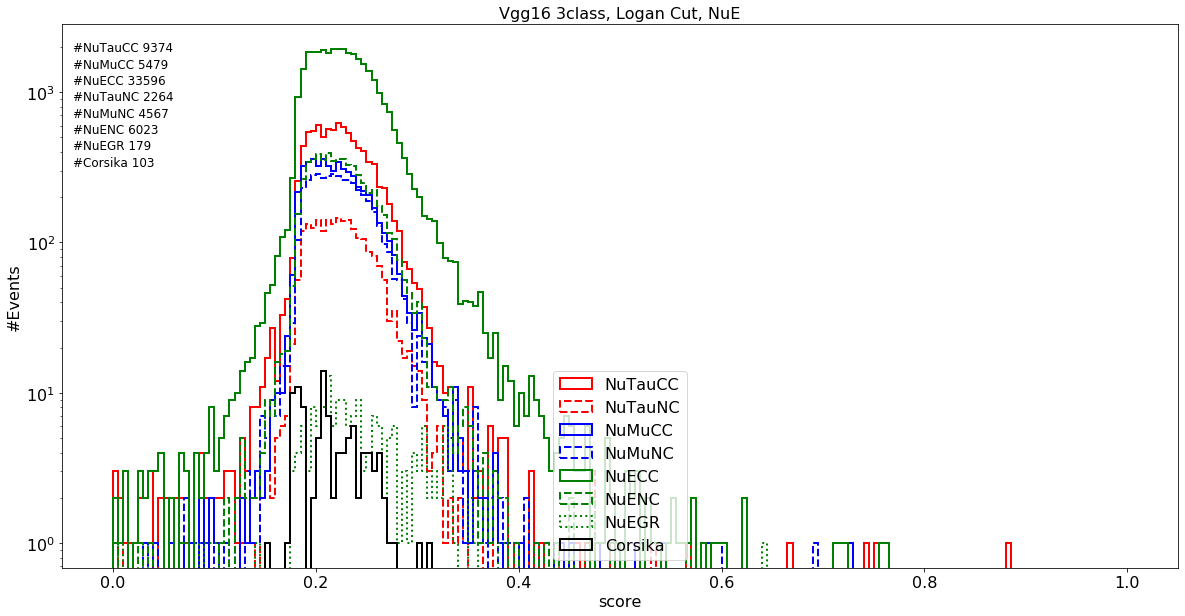

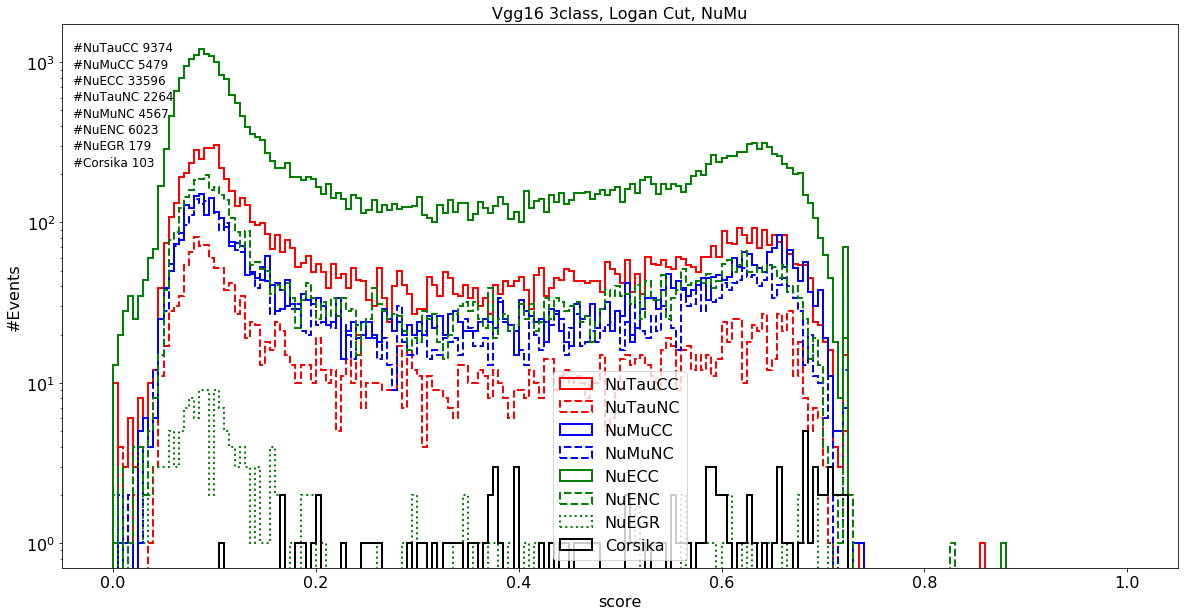

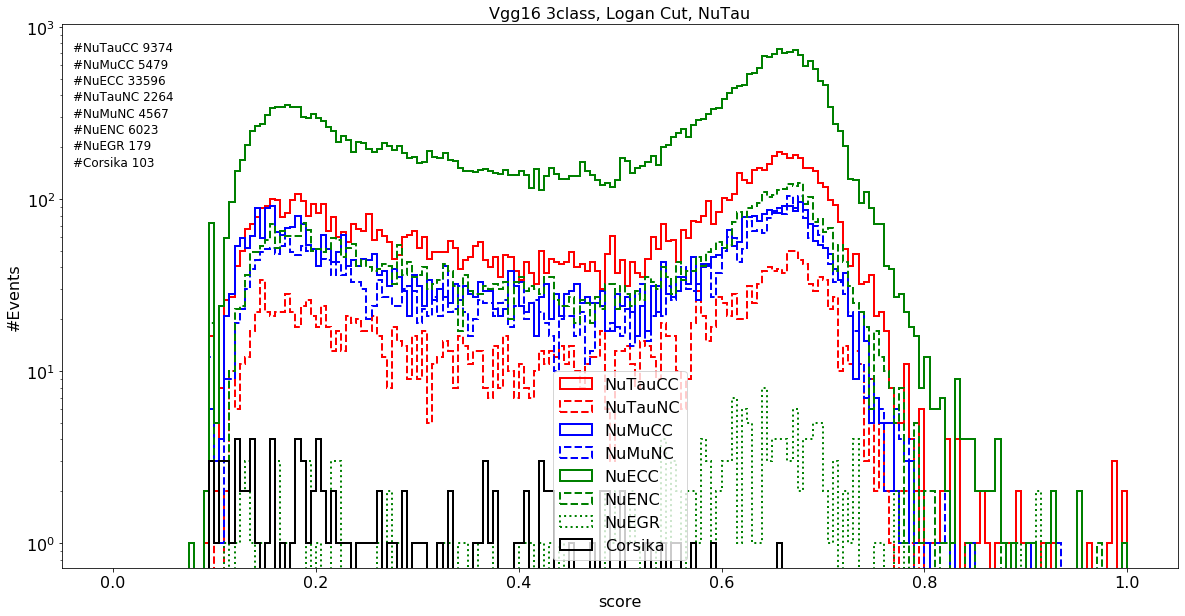

In [158]:
Plot("Vgg16 3class, Logan Cut, NuE", "score", data_tc['preds']['pred_n4'][:,0][lmask_tc],data_tn['preds']['pred_n4'][:,0][lmask_tn],\
     data_mc['preds']['pred_n4'][:,0][lmask_mc],data_mn['preds']['pred_n4'][:,0][lmask_mn],data_ec['preds']['pred_n4'][:,0][lmask_ec],\
     data_en['preds']['pred_n4'][:,0][lmask_en],data_eg['preds']['pred_n4'][:,0][lmask_eg],data_c['preds']['pred_n4'][:,0][lmask_c])
Plot("Vgg16 3class, Logan Cut, NuMu", "score", data_tc['preds']['pred_n4'][:,1][lmask_tc],data_tn['preds']['pred_n4'][:,1][lmask_tn],\
     data_mc['preds']['pred_n4'][:,1][lmask_mc],data_mn['preds']['pred_n4'][:,1][lmask_mn],data_ec['preds']['pred_n4'][:,1][lmask_ec],\
     data_en['preds']['pred_n4'][:,1][lmask_en],data_eg['preds']['pred_n4'][:,1][lmask_eg],data_c['preds']['pred_n4'][:,1][lmask_c])
Plot("Vgg16 3class, Logan Cut, NuTau", "score", data_tc['preds']['pred_n4'][:,2][lmask_tc],data_tn['preds']['pred_n4'][:,2][lmask_tn],\
     data_mc['preds']['pred_n4'][:,2][lmask_mc],data_mn['preds']['pred_n4'][:,2][lmask_mn],data_ec['preds']['pred_n4'][:,2][lmask_ec],\
     data_en['preds']['pred_n4'][:,2][lmask_en],data_eg['preds']['pred_n4'][:,2][lmask_eg],data_c['preds']['pred_n4'][:,2][lmask_c])

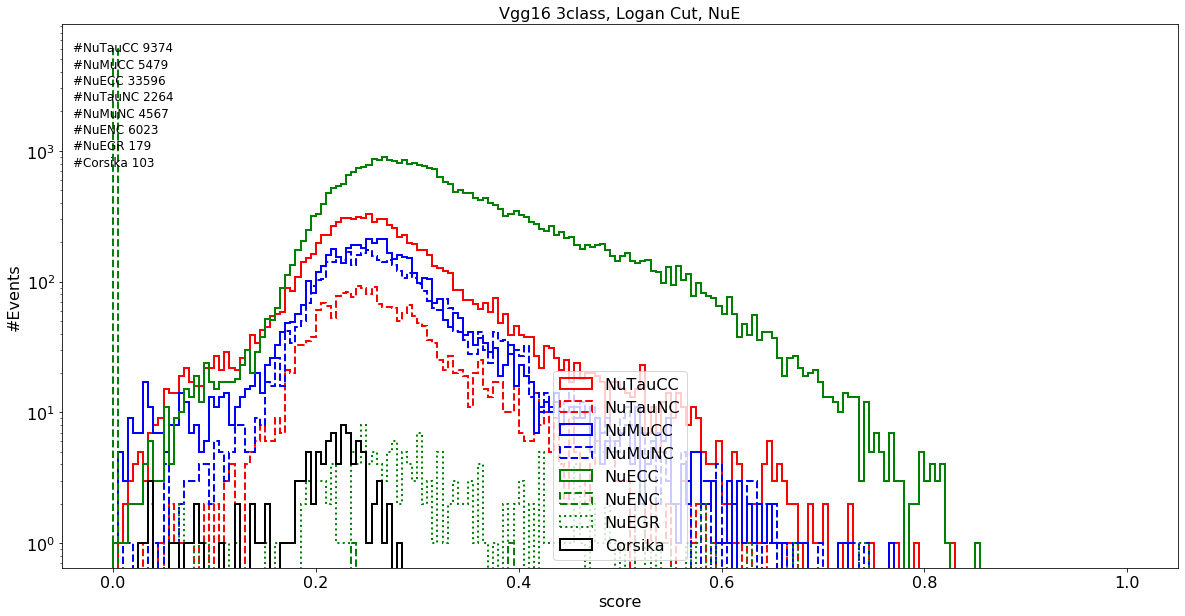

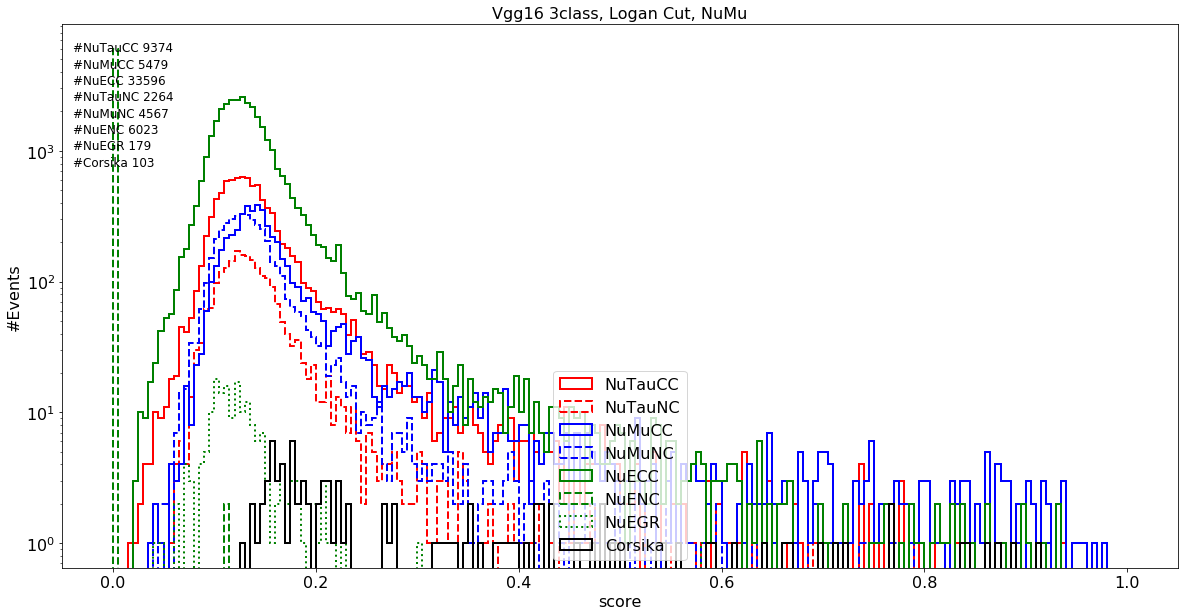

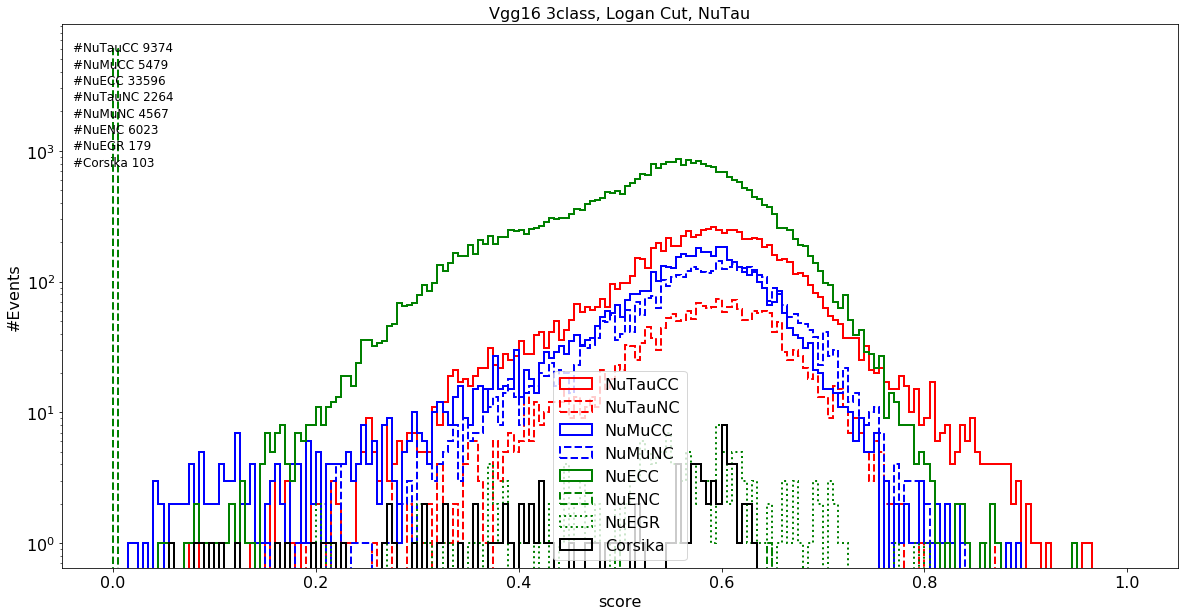

In [63]:
Plot("Vgg16 3class, Logan Cut, NuE", "score", data_tc['preds']['pred_n4'][:,0][lmask_tc],data_tn['preds']['pred_n4'][:,0][lmask_tn],\
     data_mc['preds']['pred_n4'][:,0][lmask_mc],data_mn['preds']['pred_n4'][:,0][lmask_mn],data_ec['preds']['pred_n4'][:,0][lmask_ec],\
     data_en['preds']['pred_n4'][:,0][lmask_en],data_eg['preds']['pred_n4'][:,0][lmask_eg],data_c['preds']['pred_n4'][:,0][lmask_c])
Plot("Vgg16 3class, Logan Cut, NuMu", "score", data_tc['preds']['pred_n4'][:,1][lmask_tc],data_tn['preds']['pred_n4'][:,1][lmask_tn],\
     data_mc['preds']['pred_n4'][:,1][lmask_mc],data_mn['preds']['pred_n4'][:,1][lmask_mn],data_ec['preds']['pred_n4'][:,1][lmask_ec],\
     data_en['preds']['pred_n4'][:,1][lmask_en],data_eg['preds']['pred_n4'][:,1][lmask_eg],data_c['preds']['pred_n4'][:,1][lmask_c])
Plot("Vgg16 3class, Logan Cut, NuTau", "score", data_tc['preds']['pred_n4'][:,2][lmask_tc],data_tn['preds']['pred_n4'][:,2][lmask_tn],\
     data_mc['preds']['pred_n4'][:,2][lmask_mc],data_mn['preds']['pred_n4'][:,2][lmask_mn],data_ec['preds']['pred_n4'][:,2][lmask_ec],\
     data_en['preds']['pred_n4'][:,2][lmask_en],data_eg['preds']['pred_n4'][:,2][lmask_eg],data_c['preds']['pred_n4'][:,2][lmask_c])

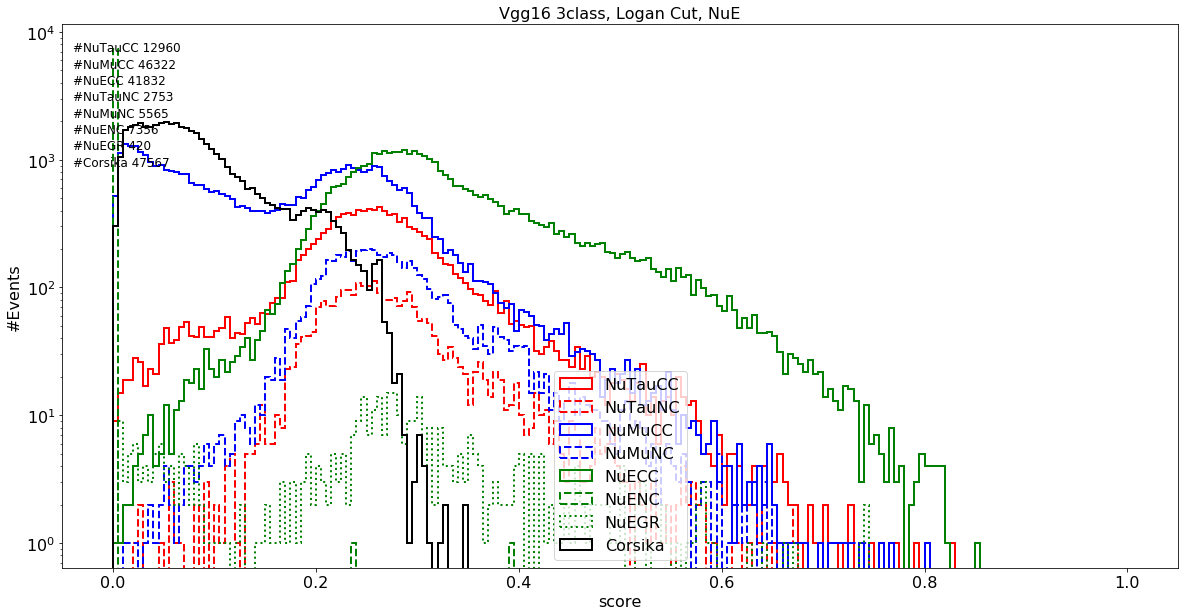

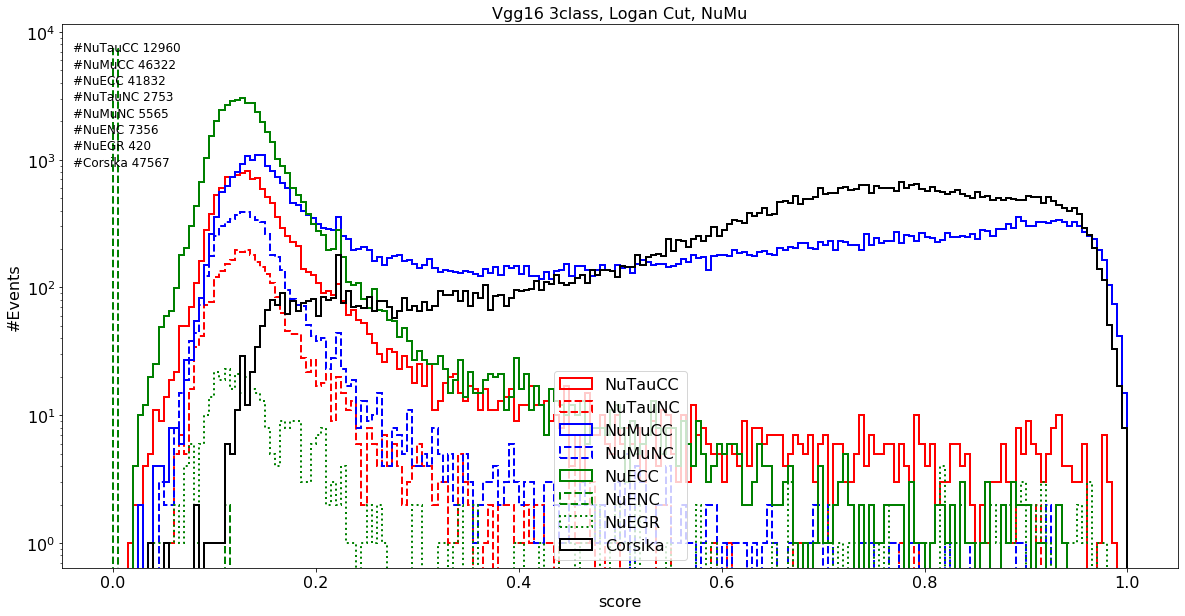

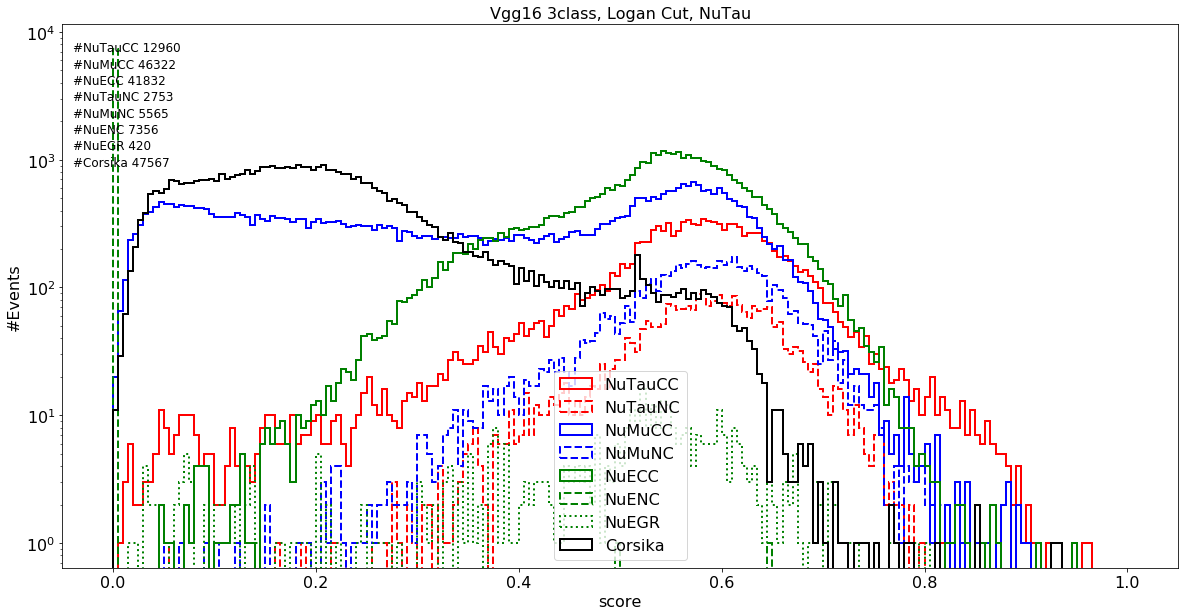

In [65]:
Plot("Vgg16 3class, Logan Cut, NuE", "score", data_tc['preds']['pred_n4'][:,0],data_tn['preds']['pred_n4'][:,0],\
     data_mc['preds']['pred_n4'][:,0],data_mn['preds']['pred_n4'][:,0],data_ec['preds']['pred_n4'][:,0],\
     data_en['preds']['pred_n4'][:,0],data_eg['preds']['pred_n4'][:,0],data_c['preds']['pred_n4'][:,0])
Plot("Vgg16 3class, Logan Cut, NuMu", "score", data_tc['preds']['pred_n4'][:,1],data_tn['preds']['pred_n4'][:,1],\
     data_mc['preds']['pred_n4'][:,1],data_mn['preds']['pred_n4'][:,1],data_ec['preds']['pred_n4'][:,1],\
     data_en['preds']['pred_n4'][:,1],data_eg['preds']['pred_n4'][:,1],data_c['preds']['pred_n4'][:,1])
Plot("Vgg16 3class, Logan Cut, NuTau", "score", data_tc['preds']['pred_n4'][:,2],data_tn['preds']['pred_n4'][:,2],\
     data_mc['preds']['pred_n4'][:,2],data_mn['preds']['pred_n4'][:,2],data_ec['preds']['pred_n4'][:,2],\
     data_en['preds']['pred_n4'][:,2],data_eg['preds']['pred_n4'][:,2],data_c['preds']['pred_n4'][:,2])

In [162]:
#Network1 score cut
n3_cut1 = 0.8
n3_cut1_mask_tc= data_tc['preds']['pred_n1'][:,2] >= n3_cut1
n3_cut1_mask_tn= data_tn['preds']['pred_n1'][:,2] >= n3_cut1
n3_cut1_mask_mc= data_mc['preds']['pred_n1'][:,2] >= n3_cut1
n3_cut1_mask_mn= data_mn['preds']['pred_n1'][:,2] >= n3_cut1
n3_cut1_mask_ec= data_ec['preds']['pred_n1'] >= n3_cut1
n3_cut1_mask_en= data_en['preds']['pred_n1'] >= n3_cut1
n3_cut1_mask_eg= data_eg['preds']['pred_n1'] >= n3_cut1
n3_cut1_mask_c= data_c['preds']['pred_n41'] >= n3_cut1

mask_tc = n3_cut1_mask_tc & lmask_tc 
mask_tn = n3_cut1_mask_tn & lmask_tn 
mask_mc = n3_cut1_mask_mc & lmask_mc 
mask_mn = n3_cut1_mask_mn & lmask_mn 
mask_ec = n3_cut1_mask_ec & lmask_ec 
mask_en = n3_cut1_mask_en & lmask_en 
mask_eg = n3_cut1_mask_eg & lmask_eg 
mask_c = n3_cut1_mask_c & lmask_c 

In [163]:
GetRates("Rates after Net3 and Logan' cut",mask_tc,mask_tn,mask_mc,mask_mn,mask_ec,mask_en,mask_eg,mask_c)

Rates after Net3 and Logan' cut
TauCC = 0.016 +/- 0.007
TauNC = 0.000 +/- 0.000
MuCC =  0.001 +/- 0.001
MuNC =  0.004 +/- 0.003
ECC =   0.050 +/- 0.016
ENC =   0.006 +/- 0.003
EGR =   0.005 +/- 0.004
Single = 0.065 +/- 0.025
Double = 0.016 +/- 0.007
Track =  0.001 +/- 0.001
Corsika =  0.000 +/- 0.000


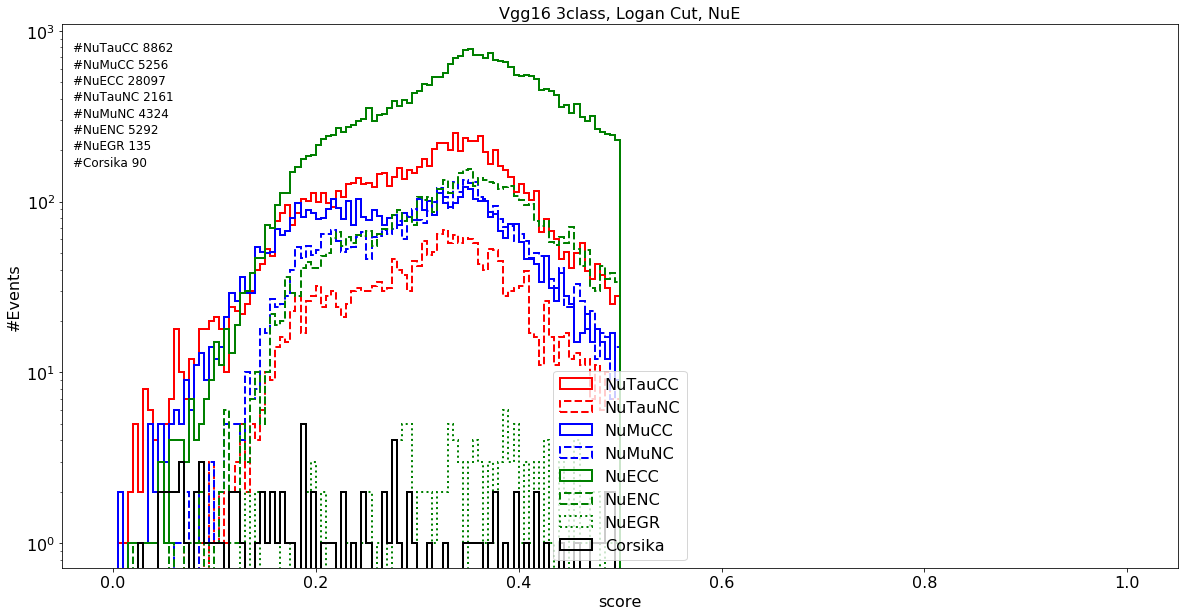

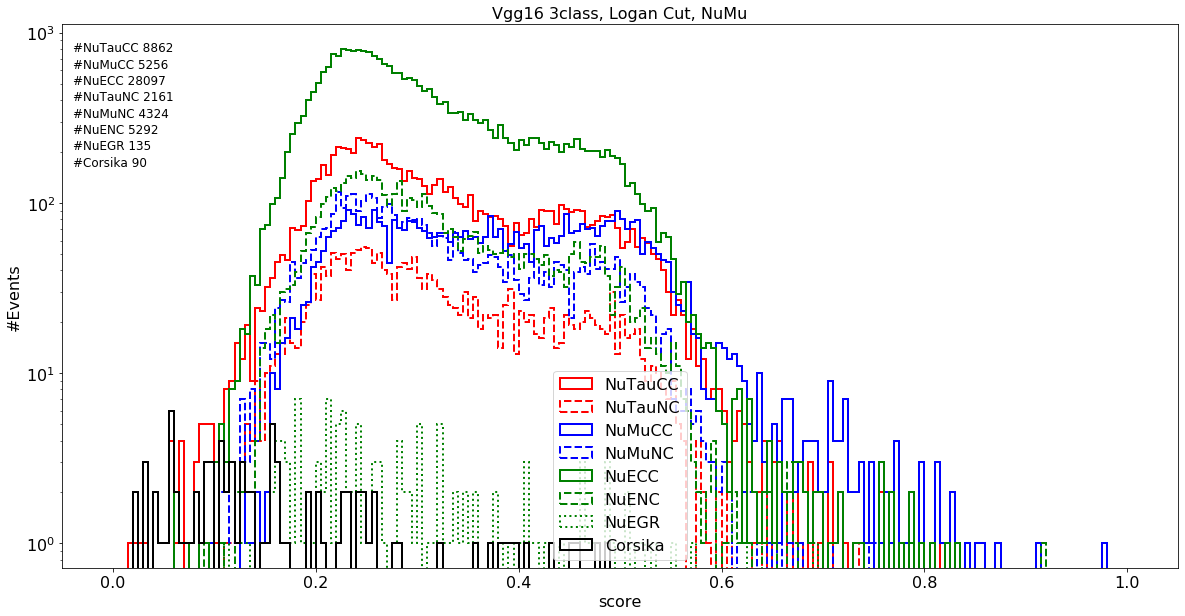

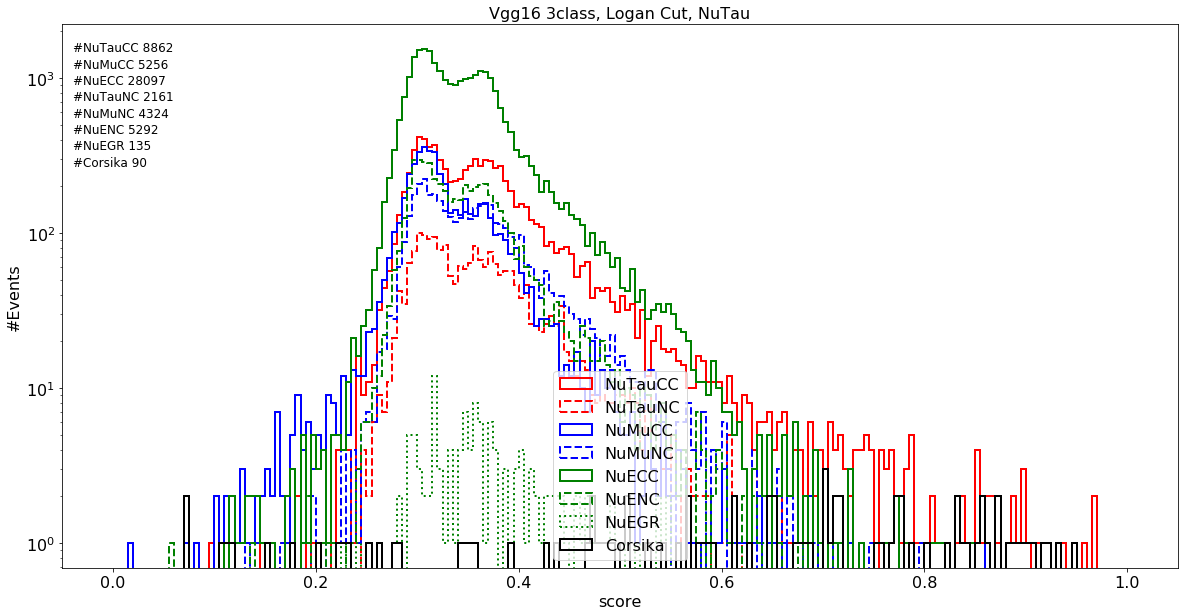

In [721]:
Plot("Vgg16 3class, Logan Cut, NuE", "score", data_tc['pred_mc'][:,0][mask_tc],data_tn['pred_mc'][:,0][mask_tn],\
     data_mc['pred_mc'][:,0][mask_mc],data_mn['pred_mc'][:,0][mask_mn],data_ec['pred_mc'][:,0][mask_ec],\
     data_en['pred_mc'][:,0][mask_en],data_eg['pred_mc'][:,0][mask_eg],data_c['pred_mc'][:,0][mask_c])
Plot("Vgg16 3class, Logan Cut, NuMu", "score", data_tc['pred_mc'][:,1][mask_tc],data_tn['pred_mc'][:,1][mask_tn],\
     data_mc['pred_mc'][:,1][mask_mc],data_mn['pred_mc'][:,1][mask_mn],data_ec['pred_mc'][:,1][mask_ec],\
     data_en['pred_mc'][:,1][mask_en],data_eg['pred_mc'][:,1][mask_eg],data_c['pred_mc'][:,1][mask_c])
Plot("Vgg16 3class, Logan Cut, NuTau", "score", data_tc['pred_mc'][:,2][mask_tc],data_tn['pred_mc'][:,2][mask_tn],\
     data_mc['pred_mc'][:,2][mask_mc],data_mn['pred_mc'][:,2][mask_mn],data_ec['pred_mc'][:,2][mask_ec],\
     data_en['pred_mc'][:,2][mask_en],data_eg['pred_mc'][:,2][mask_eg],data_c['pred_mc'][:,2][mask_c])

In [722]:
#Network1 score cut
n3_cut2 = 0.7
n3_cut2_mask_tc= data_tc['pred_mc'][:,1] <= n3_cut2
n3_cut2_mask_tn= data_tn['pred_mc'][:,1] <= n3_cut2
n3_cut2_mask_mc= data_mc['pred_mc'][:,1] <= n3_cut2
n3_cut2_mask_mn= data_mn['pred_mc'][:,1] <= n3_cut2
n3_cut2_mask_ec= data_ec['pred_mc'][:,1] <= n3_cut2
n3_cut2_mask_en= data_en['pred_mc'][:,1] <= n3_cut2
n3_cut2_mask_eg= data_eg['pred_mc'][:,1] <= n3_cut2
n3_cut2_mask_c= data_c['pred_mc'][:,1] <= n3_cut2

mask_tc = n3_cut2_mask_tc & n3_cut1_mask_tc & lmask_tc 
mask_tn = n3_cut2_mask_tn & n3_cut1_mask_tn & lmask_tn 
mask_mc = n3_cut2_mask_mc & n3_cut1_mask_mc & lmask_mc 
mask_mn = n3_cut2_mask_mn & n3_cut1_mask_mn & lmask_mn 
mask_ec = n3_cut2_mask_ec & n3_cut1_mask_ec & lmask_ec 
mask_en = n3_cut2_mask_en & n3_cut1_mask_en & lmask_en 
mask_eg = n3_cut2_mask_eg & n3_cut1_mask_eg & lmask_eg 
mask_c = n3_cut2_mask_c & n3_cut1_mask_c & lmask_c 

In [729]:
GetRates("Rates after Net3 and Logan' cut",mask_tc,mask_tn,mask_mc,mask_mn,mask_ec,mask_en,mask_eg,mask_c)

Rates after Net3 and Logan' cut
TauCC = 0.024 +/- 0.003
TauNC = 0.000 +/- 0.000
MuCC =  0.000 +/- 0.000
MuNC =  0.000 +/- 0.000
ECC =   0.002 +/- 0.001
ENC =   0.000 +/- 0.000
EGR =   0.000 +/- 0.000
Single = 0.003 +/- 0.001
Double = 0.024 +/- 0.003
Track =  0.000 +/- 0.000
Corsika =  0.000 +/- 0.000


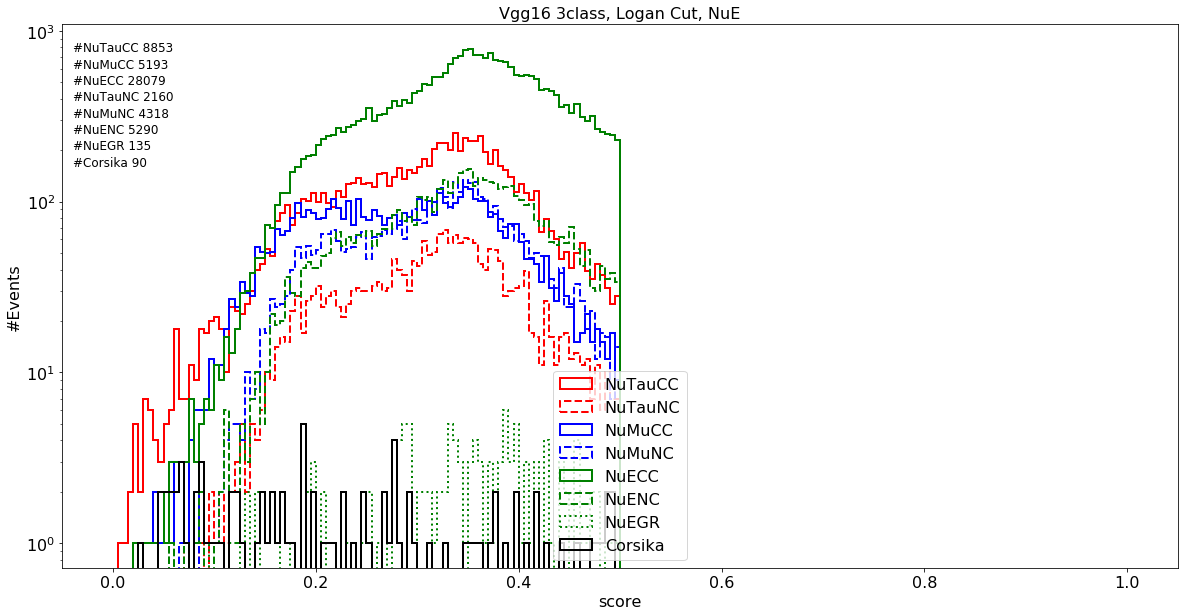

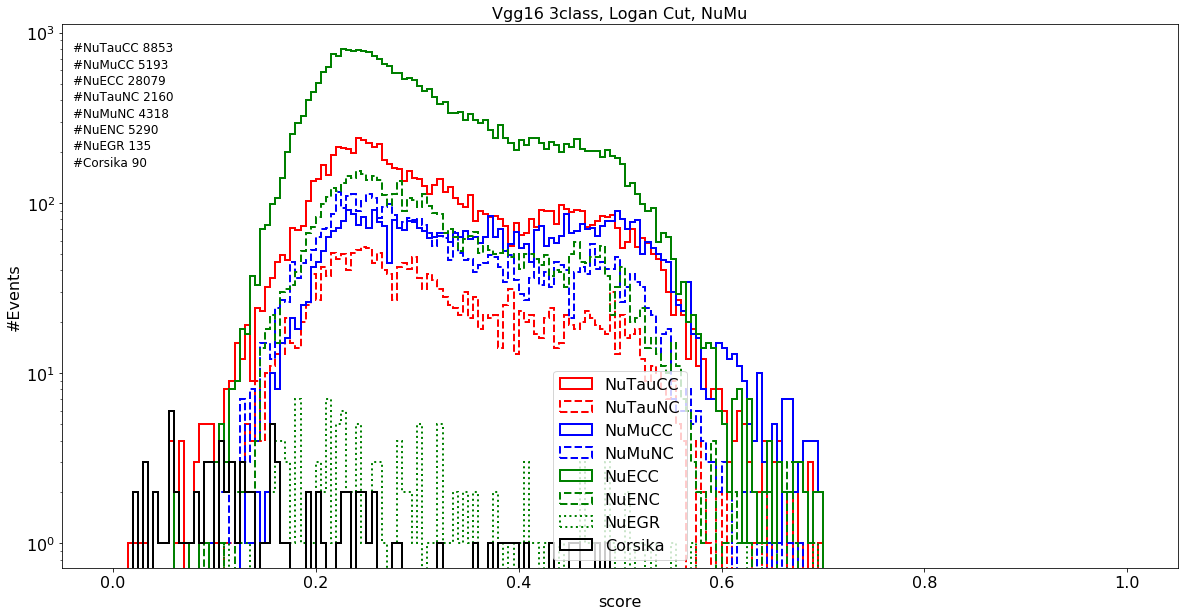

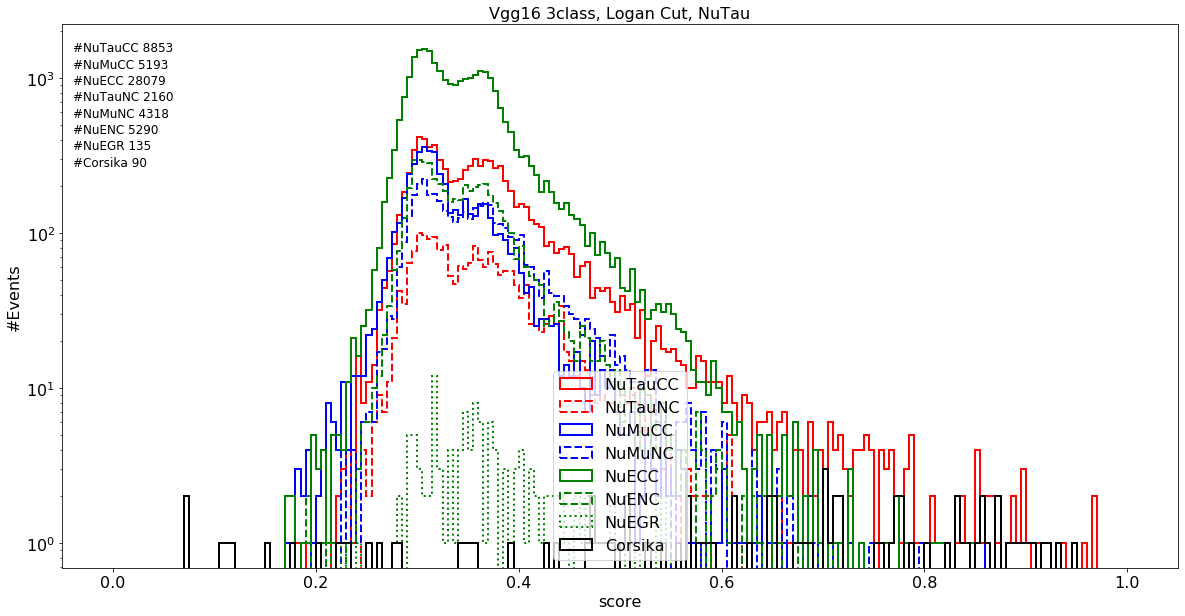

In [723]:
Plot("Vgg16 3class, Logan Cut, NuE", "score", data_tc['pred_mc'][:,0][mask_tc],data_tn['pred_mc'][:,0][mask_tn],\
     data_mc['pred_mc'][:,0][mask_mc],data_mn['pred_mc'][:,0][mask_mn],data_ec['pred_mc'][:,0][mask_ec],\
     data_en['pred_mc'][:,0][mask_en],data_eg['pred_mc'][:,0][mask_eg],data_c['pred_mc'][:,0][mask_c])
Plot("Vgg16 3class, Logan Cut, NuMu", "score", data_tc['pred_mc'][:,1][mask_tc],data_tn['pred_mc'][:,1][mask_tn],\
     data_mc['pred_mc'][:,1][mask_mc],data_mn['pred_mc'][:,1][mask_mn],data_ec['pred_mc'][:,1][mask_ec],\
     data_en['pred_mc'][:,1][mask_en],data_eg['pred_mc'][:,1][mask_eg],data_c['pred_mc'][:,1][mask_c])
Plot("Vgg16 3class, Logan Cut, NuTau", "score", data_tc['pred_mc'][:,2][mask_tc],data_tn['pred_mc'][:,2][mask_tn],\
     data_mc['pred_mc'][:,2][mask_mc],data_mn['pred_mc'][:,2][mask_mn],data_ec['pred_mc'][:,2][mask_ec],\
     data_en['pred_mc'][:,2][mask_en],data_eg['pred_mc'][:,2][mask_eg],data_c['pred_mc'][:,2][mask_c])

In [726]:
#Network1 score cut
n3_cut3 = 0.7
n3_cut3_mask_tc= data_tc['pred_mc'][:,2] >= n3_cut3
n3_cut3_mask_tn= data_tn['pred_mc'][:,2] >= n3_cut3
n3_cut3_mask_mc= data_mc['pred_mc'][:,2] >= n3_cut3
n3_cut3_mask_mn= data_mn['pred_mc'][:,2] >= n3_cut3
n3_cut3_mask_ec= data_ec['pred_mc'][:,2] >= n3_cut3
n3_cut3_mask_en= data_en['pred_mc'][:,2] >= n3_cut3
n3_cut3_mask_eg= data_eg['pred_mc'][:,2] >= n3_cut3
n3_cut3_mask_c= data_c['pred_mc'][:,2] >= n3_cut3

mask_tc = n3_cut3_mask_tc & n3_cut2_mask_tc & n3_cut1_mask_tc & lmask_tc 
mask_tn = n3_cut3_mask_tn & n3_cut2_mask_tn & n3_cut1_mask_tn & lmask_tn 
mask_mc = n3_cut3_mask_mc & n3_cut2_mask_mc & n3_cut1_mask_mc & lmask_mc 
mask_mn = n3_cut3_mask_mn & n3_cut2_mask_mn & n3_cut1_mask_mn & lmask_mn 
mask_ec = n3_cut3_mask_ec & n3_cut2_mask_ec & n3_cut1_mask_ec & lmask_ec 
mask_en = n3_cut3_mask_en & n3_cut2_mask_en & n3_cut1_mask_en & lmask_en 
mask_eg = n3_cut3_mask_eg & n3_cut2_mask_eg & n3_cut1_mask_eg & lmask_eg 
mask_c = n3_cut3_mask_c & n3_cut2_mask_c & n3_cut1_mask_c & lmask_c 

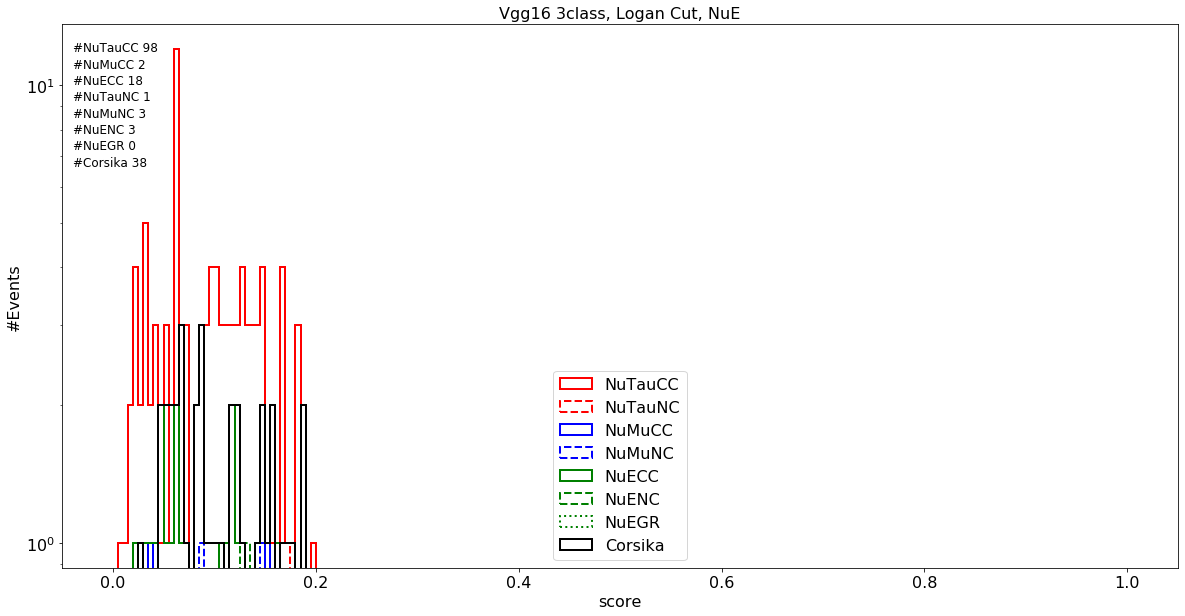

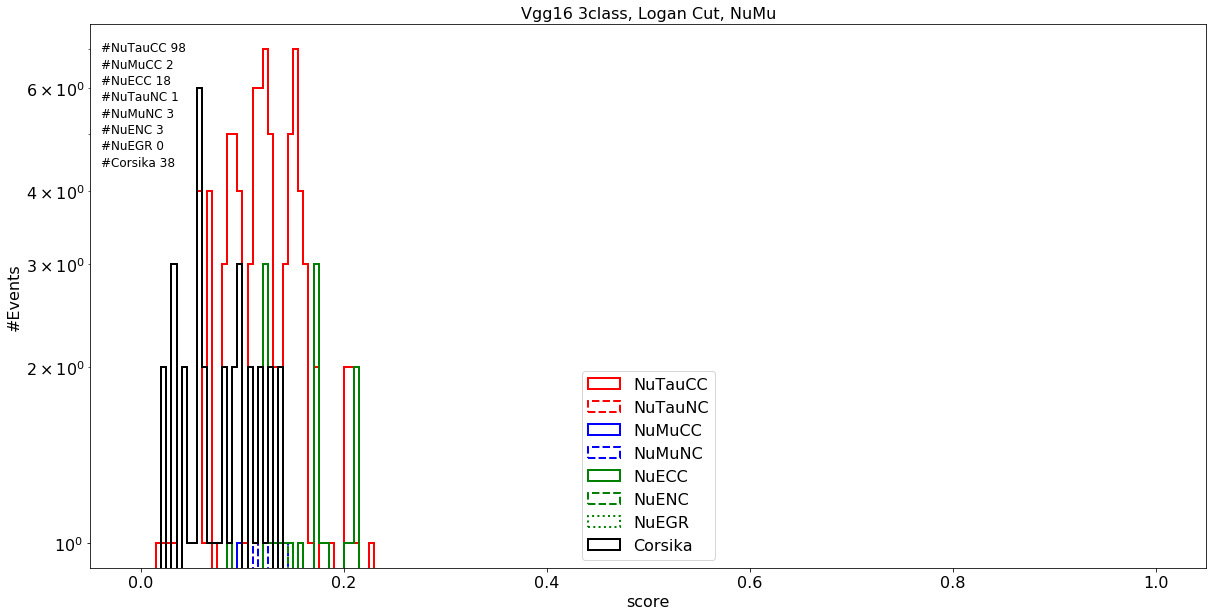

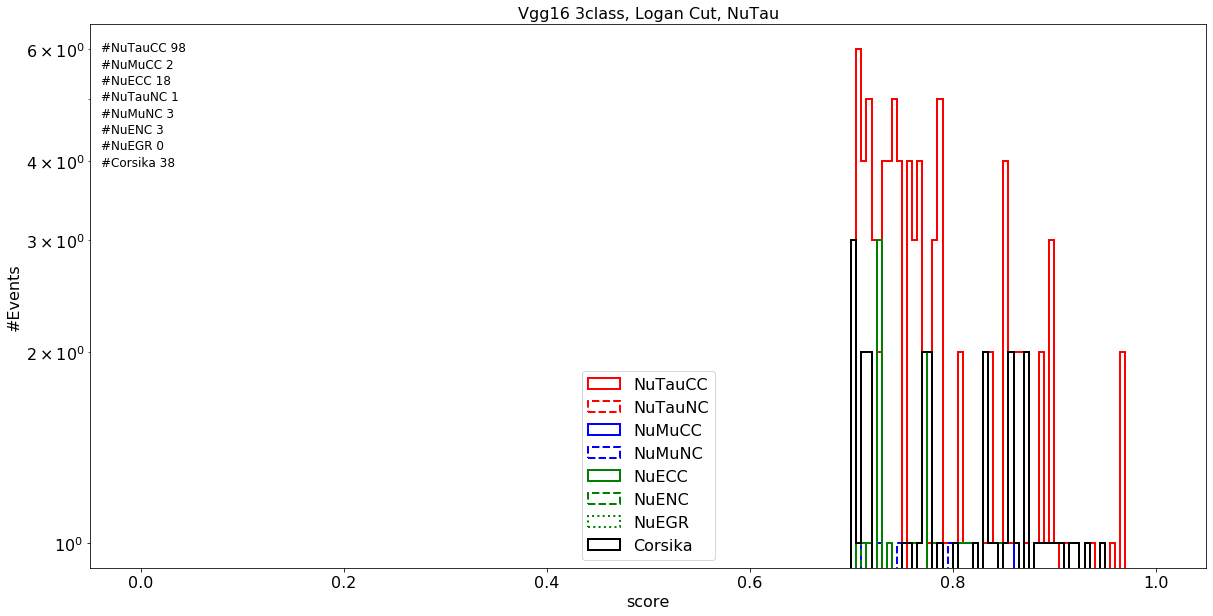

In [727]:
Plot("Vgg16 3class, Logan Cut, NuE", "score", data_tc['pred_mc'][:,0][mask_tc],data_tn['pred_mc'][:,0][mask_tn],\
     data_mc['pred_mc'][:,0][mask_mc],data_mn['pred_mc'][:,0][mask_mn],data_ec['pred_mc'][:,0][mask_ec],\
     data_en['pred_mc'][:,0][mask_en],data_eg['pred_mc'][:,0][mask_eg],data_c['pred_mc'][:,0][mask_c])
Plot("Vgg16 3class, Logan Cut, NuMu", "score", data_tc['pred_mc'][:,1][mask_tc],data_tn['pred_mc'][:,1][mask_tn],\
     data_mc['pred_mc'][:,1][mask_mc],data_mn['pred_mc'][:,1][mask_mn],data_ec['pred_mc'][:,1][mask_ec],\
     data_en['pred_mc'][:,1][mask_en],data_eg['pred_mc'][:,1][mask_eg],data_c['pred_mc'][:,1][mask_c])
Plot("Vgg16 3class, Logan Cut, NuTau", "score", data_tc['pred_mc'][:,2][mask_tc],data_tn['pred_mc'][:,2][mask_tn],\
     data_mc['pred_mc'][:,2][mask_mc],data_mn['pred_mc'][:,2][mask_mn],data_ec['pred_mc'][:,2][mask_ec],\
     data_en['pred_mc'][:,2][mask_en],data_eg['pred_mc'][:,2][mask_eg],data_c['pred_mc'][:,2][mask_c])

In [729]:
GetRates("Rates after Net3 and Logan' cut",mask_tc,mask_tn,mask_mc,mask_mn,mask_ec,mask_en,mask_eg,mask_c)

Rates after Net3 and Logan' cut
TauCC = 0.024 +/- 0.003
TauNC = 0.000 +/- 0.000
MuCC =  0.000 +/- 0.000
MuNC =  0.000 +/- 0.000
ECC =   0.002 +/- 0.001
ENC =   0.000 +/- 0.000
EGR =   0.000 +/- 0.000
Single = 0.003 +/- 0.001
Double = 0.024 +/- 0.003
Track =  0.000 +/- 0.000
Corsika =  0.000 +/- 0.000


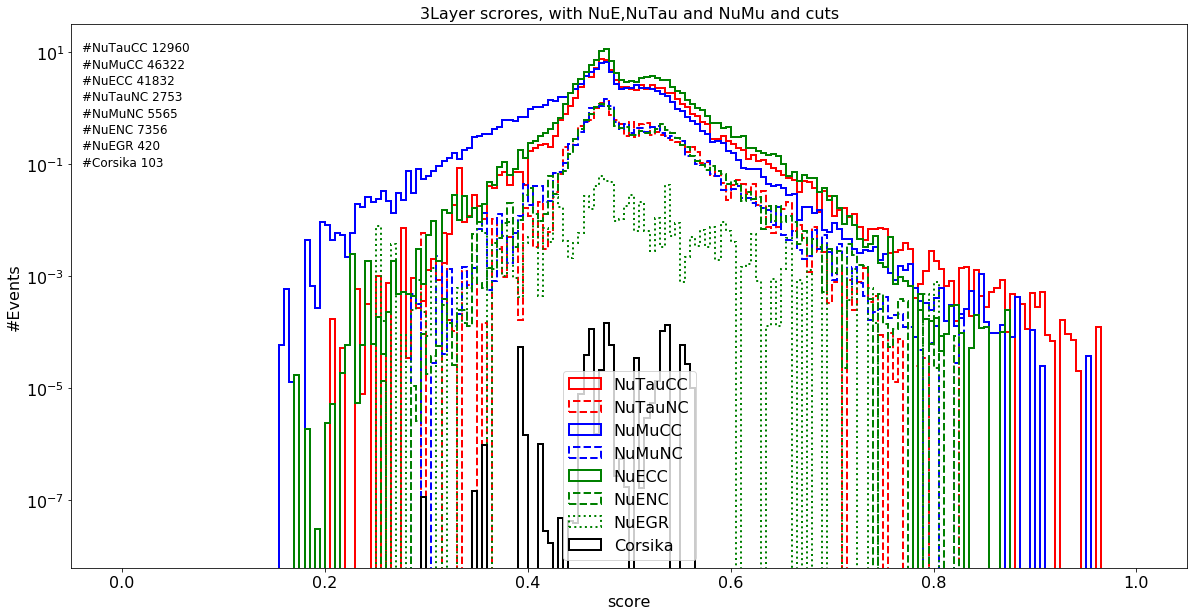

In [681]:
PlotW("3Layer scrores, with NuE,NuTau and NuMu and cuts", "score", data_tc['pred_mc'],data_tn['pred_mc'],data_mc['pred_mc'],data_mn['pred_mc'],\
     data_ec['pred_mc'],data_en['pred_mc'],data_eg['pred_mc'],data_c['pred_mc'][lmask_c], data_tc['weight_val'],data_tn['weight_val'],data_mc['weight_val'],\
     data_mn['weight_val'],data_ec['weight_val'],data_en['weight_val'],data_eg['weight_val'],data_c['weight_val'][lmask_c])

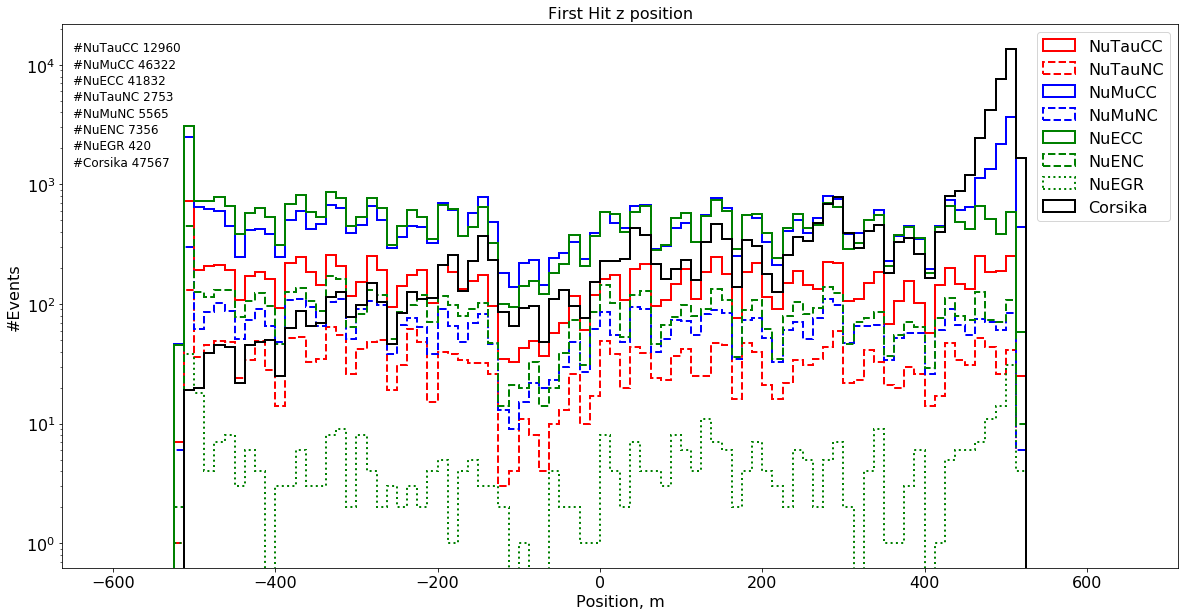

In [682]:
Plot("First Hit z position", "Position, m", data_tc['logan_veto']["FirstHitZ"],data_tn['logan_veto']["FirstHitZ"],\
    data_mc['logan_veto']["FirstHitZ"],data_mn['logan_veto']["FirstHitZ"],data_ec['logan_veto']["FirstHitZ"],\
    data_en['logan_veto']["FirstHitZ"],data_eg['logan_veto']["FirstHitZ"],data_c['logan_veto']["FirstHitZ"], b=100,r=[-600,650],loc=1)

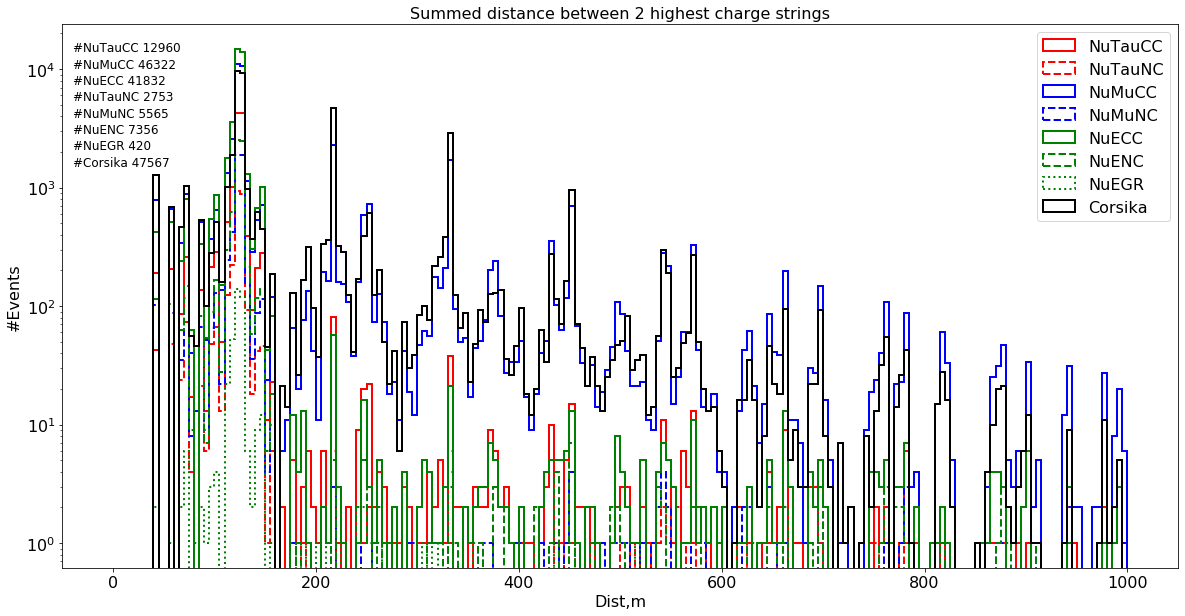

In [683]:
N=2
Plot("Summed distance between {0} highest charge strings".format(N), "Dist,m",\
    [sum(np.sqrt(i[:N])) for i in data_tc['qst_all']['dist']],\
    [sum(np.sqrt(i[:N])) for i in data_tn['qst_all']['dist']],\
    [sum(np.sqrt(i[:N])) for i in data_mc['qst_all']['dist']],\
    [sum(np.sqrt(i[:N])) for i in data_mn['qst_all']['dist']],\
    [sum(np.sqrt(i[:N])) for i in data_ec['qst_all']['dist']],\
    [sum(np.sqrt(i[:N])) for i in data_en['qst_all']['dist']],\
    [sum(np.sqrt(i[:N])) for i in data_eg['qst_all']['dist']],\
    [sum(np.sqrt(i[:N])) for i in data_c['qst_all']['dist']], r=[0,1000],loc=1)

In [692]:
data_2 = np.concatenate([data_ec['pred'],data_en['pred'],data_eg['pred'],data_mn['pred'],data_tn['pred']],axis =0)
weight_2 = np.concatenate([data_ec['weight_val'],data_en['weight_val'],data_eg['weight_val'],data_mn['weight_val'],data_tn['weight_val']],axis =0)
plot_data = ROCCurve(data_tc['pred'],data_2,data_tc['weight_val'],weight_2,cut_range=[0,1],step=0.001)

KeyboardInterrupt: 

In [697]:
print(plot_data)

[[0.00000000e+00 7.67087860e+01 1.53144302e+02 1.18647051e+00
  1.19138980e+00]
 [1.00000000e-03 7.67087860e+01 1.53144302e+02 1.18647051e+00
  1.19138980e+00]
 [2.00000000e-03 7.67087860e+01 1.53144302e+02 1.18647051e+00
  1.19138980e+00]
 ...
 [9.97000000e-01 9.95991468e-01 4.48775738e-02 6.63345456e-02
  1.04039693e-02]
 [9.98000000e-01 7.84034848e-01 3.51542942e-02 5.23254983e-02
  9.43086389e-03]
 [9.99000000e-01 4.87715483e-01 2.12774985e-02 3.58927213e-02
  6.38465397e-03]]


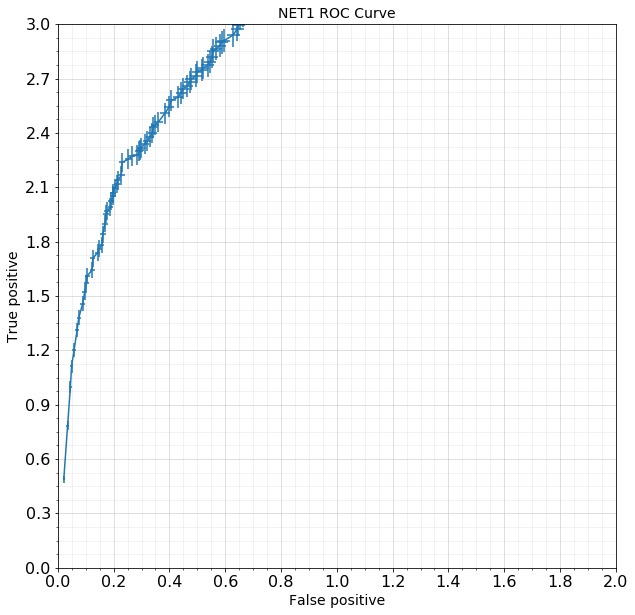

In [689]:
PlotROCCurve("NET1 ROC Curve",plot_data,lims=[0,2,0,3])    

1225.1544189453125 1838.82470703125 613.6702880859375
613.6702880859375 1225.1544189453125 17.532331806996957 17.532331806996957
[[0.00000000e+00 7.67087860e+01 1.53144302e+02 ... 1.19138980e+00
  1.63096520e+01 1.75323318e+01]
 [1.00000000e-03 7.67087860e+01 1.53144302e+02 ... 1.19138980e+00
  1.63096520e+01 1.75323318e+01]
 [2.00000000e-03 7.67087860e+01 1.53144302e+02 ... 1.19138980e+00
  1.63096520e+01 1.75323318e+01]
 ...
 [9.97000000e-01 9.95991468e-01 4.48775738e-02 ... 1.04039693e-02
  6.03505582e+00 1.32979877e+01]
 [9.98000000e-01 7.84034848e-01 3.51542942e-02 ... 9.43086389e-03
  5.35945975e+00 1.18274513e+01]
 [9.99000000e-01 4.87715483e-01 2.12774985e-02 ... 6.38465397e-03
  4.24872188e+00 9.45695347e+00]]


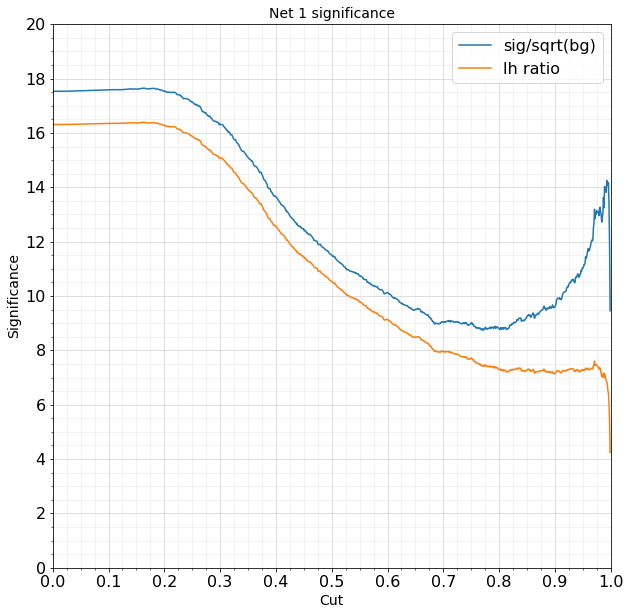

In [703]:
sig = Significance(plot_data)
print(sig)
PlotSig("Net 1 significance",sig, lims = [0,1,0,20])

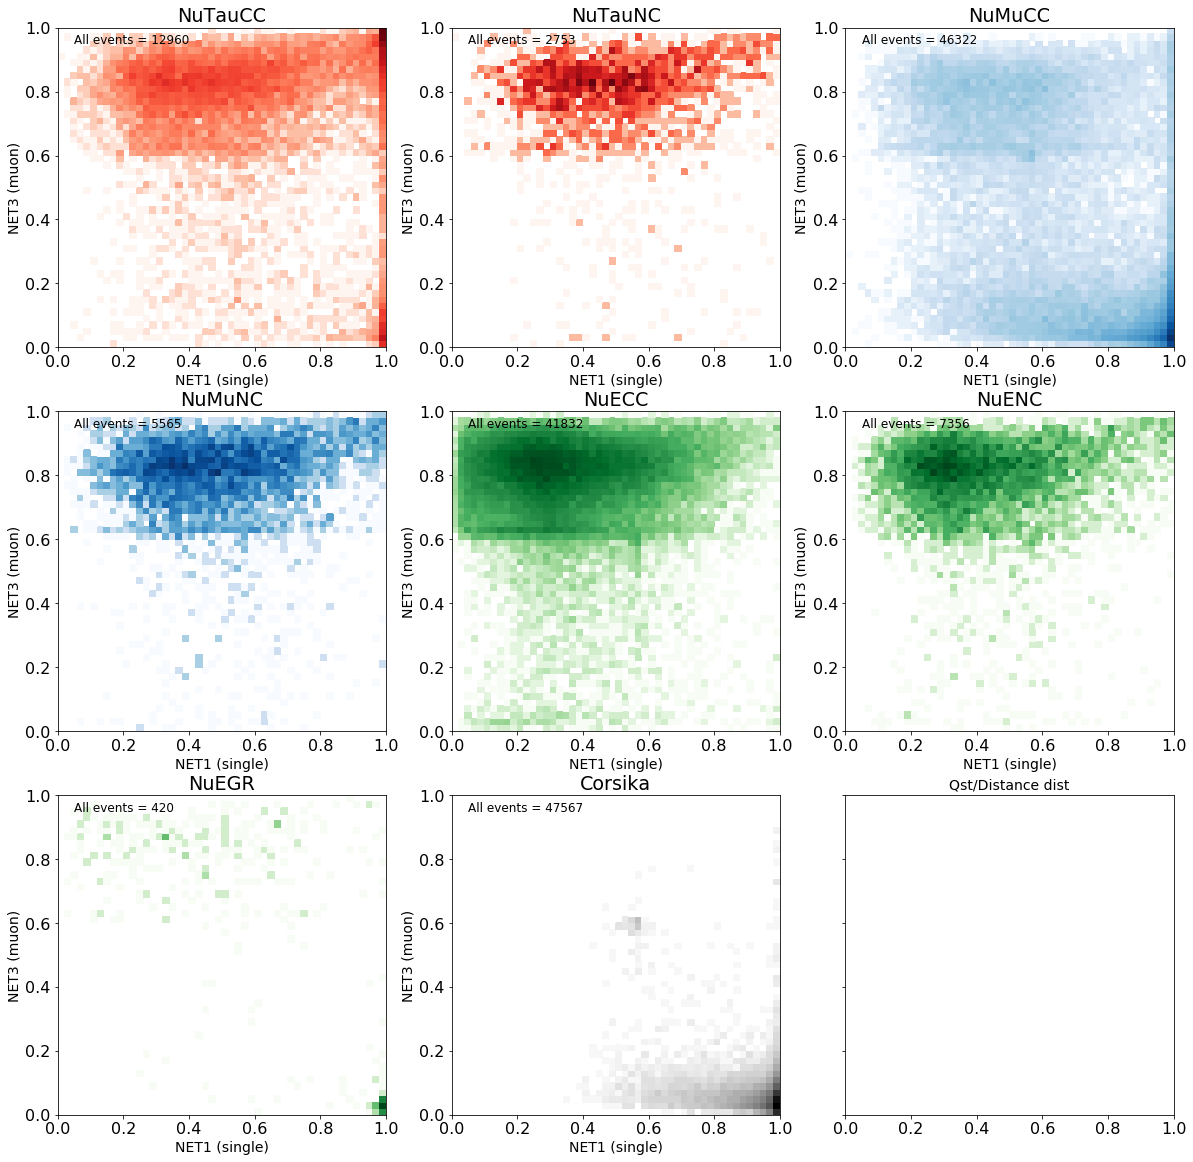

In [122]:
fig, ax = plt.subplots(nrows=3, ncols=3,sharex = True,sharey=True, figsize=(20,20))
plt.title('Qst/Distance dist', fontdict={'fontsize': 14, 'fontweight': 'medium'})

plt.subplot(3,3,1)
plt.gca().set_title('NuTauCC')
plt.hist2d(data_tc['preds']['pred_n1'], data_tc['preds']['pred_n3'][:,0], bins = 50, range = [[0,1],[0,1]], norm=mpl.colors.LogNorm() ,cmap = 'Reds')
plt.text(0.05,0.95,'All events = '+str(len(data_tc)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
#plt.colorbar()

plt.subplot(3,3,2)
plt.gca().set_title('NuTauNC')
plt.hist2d(data_tn['preds']['pred_n1'], data_tn['preds']['pred_n3'][:,0], bins = 50, range = [[0,1],[0,1]],norm=mpl.colors.LogNorm() ,cmap = 'Reds')
plt.text(0.05,0.95,'All events = '+str(len(data_tn)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
#plt.colorbar()

plt.subplot(3,3,3)
plt.gca().set_title('NuMuCC')
plt.hist2d(data_mc['preds']['pred_n1'], data_mc['preds']['pred_n3'][:,0], bins = 50, range = [[0,1],[0,1]],norm=mpl.colors.LogNorm() ,cmap = 'Blues')
plt.text(0.05,0.95,'All events = '+str(len(data_mc)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
#plt.colorbar()

plt.subplot(3,3,4)
plt.gca().set_title('NuMuNC')
plt.hist2d(data_mn['preds']['pred_n1'], data_mn['preds']['pred_n3'][:,0], bins = 50, range = [[0,1],[0,1]],norm=mpl.colors.LogNorm() ,cmap = 'Blues')
plt.text(0.05,0.95,'All events = '+str(len(data_mn)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
#plt.colorbar()

plt.subplot(3,3,5)
plt.gca().set_title('NuECC')
plt.hist2d(data_ec['preds']['pred_n1'], data_ec['preds']['pred_n3'][:,0], bins = 50, range = [[0,1],[0,1]],norm=mpl.colors.LogNorm() ,cmap = 'Greens')
plt.text(0.05,0.95,'All events = '+str(len(data_ec)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
#plt.colorbar()

plt.subplot(3,3,6)
plt.gca().set_title('NuENC')
plt.hist2d(data_en['preds']['pred_n1'], data_en['preds']['pred_n3'][:,0], bins = 50, range = [[0,1],[0,1]],norm=mpl.colors.LogNorm() ,cmap = 'Greens')
plt.text(0.05,0.95,'All events = '+str(len(data_en)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
#plt.colorbar()

plt.subplot(3,3,7)
plt.gca().set_title('NuEGR')
plt.hist2d(data_eg['preds']['pred_n1'], data_eg['preds']['pred_n3'][:,0], bins = 50, range = [[0,1],[0,1]],norm=mpl.colors.LogNorm() ,cmap = 'Greens')
plt.text(0.05,0.95,'All events = '+str(len(data_eg)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
#plt.colorbar()

plt.subplot(3,3,8)
plt.gca().set_title('Corsika')
plt.hist2d(data_c['preds']['pred_n1'], data_c['preds']['pred_n3'][:,0], bins = 50, range = [[0,1],[0,1]], norm=mpl.colors.LogNorm() ,cmap = 'Greys')
plt.text(0.05,0.95,'All events = '+str(len(data_c)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
#plt.colorbar()

plt.show()

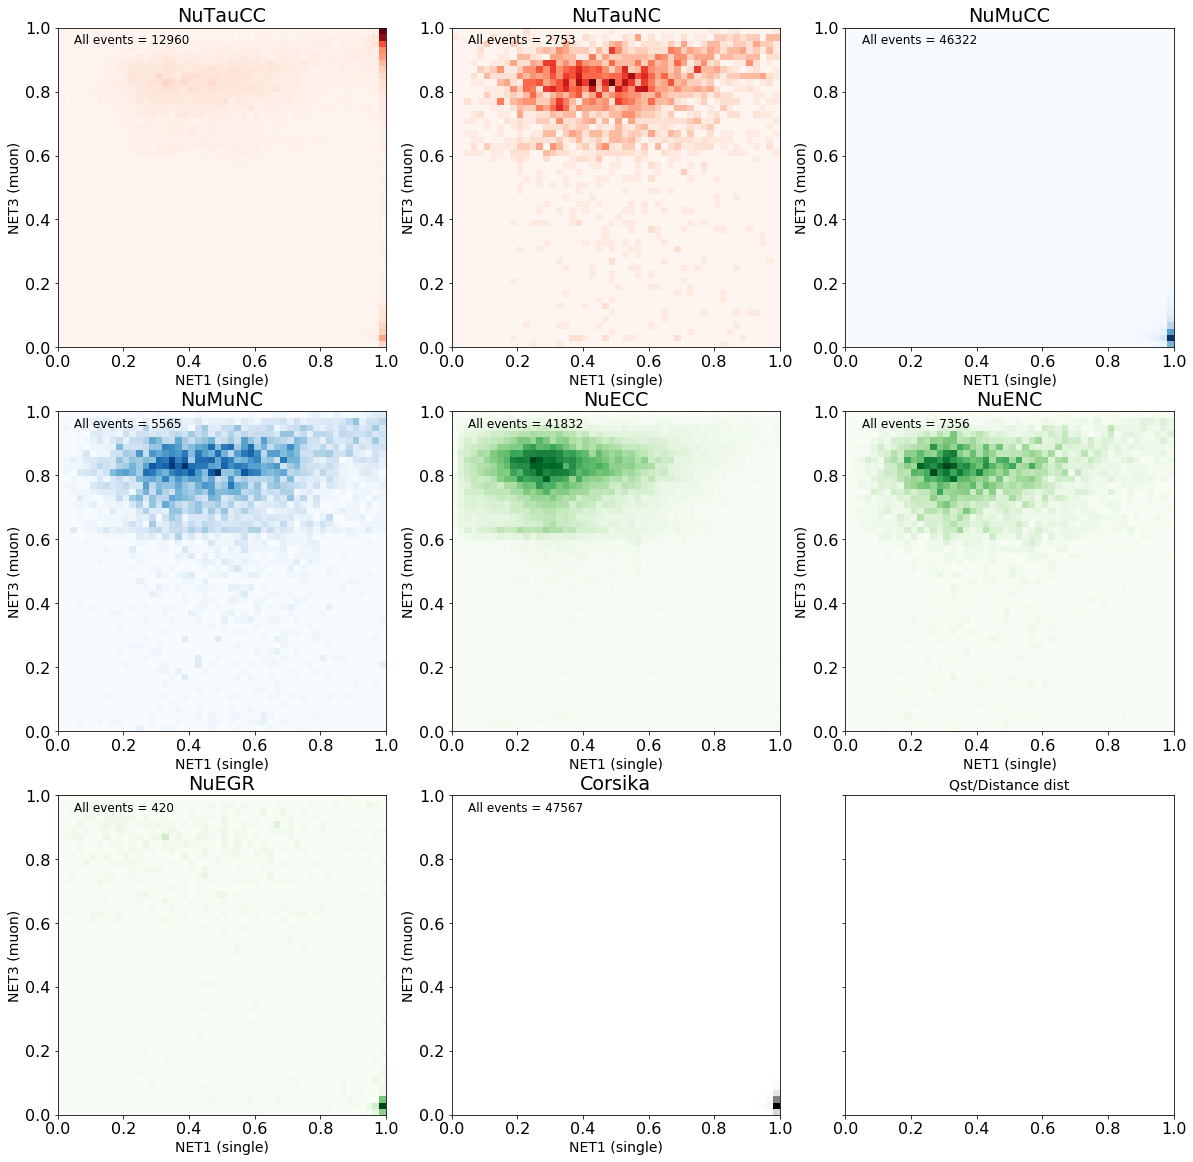

In [123]:
fig, ax = plt.subplots(nrows=3, ncols=3,sharex = True,sharey=True, figsize=(20,20))
plt.title('Qst/Distance dist', fontdict={'fontsize': 14, 'fontweight': 'medium'})

plt.subplot(3,3,1)
plt.gca().set_title('NuTauCC')
plt.hist2d(data_tc['preds']['pred_n1'], data_tc['preds']['pred_n3'][:,0], bins = 50, range = [[0,1],[0,1]] ,cmap = 'Reds')
plt.text(0.05,0.95,'All events = '+str(len(data_tc)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
#plt.colorbar()

plt.subplot(3,3,2)
plt.gca().set_title('NuTauNC')
plt.hist2d(data_tn['preds']['pred_n1'], data_tn['preds']['pred_n3'][:,0], bins = 50, range = [[0,1],[0,1]] ,cmap = 'Reds')
plt.text(0.05,0.95,'All events = '+str(len(data_tn)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
#plt.colorbar()

plt.subplot(3,3,3)
plt.gca().set_title('NuMuCC')
plt.hist2d(data_mc['preds']['pred_n1'], data_mc['preds']['pred_n3'][:,0], bins = 50, range = [[0,1],[0,1]] ,cmap = 'Blues')
plt.text(0.05,0.95,'All events = '+str(len(data_mc)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
#plt.colorbar()

plt.subplot(3,3,4)
plt.gca().set_title('NuMuNC')
plt.hist2d(data_mn['preds']['pred_n1'], data_mn['preds']['pred_n3'][:,0], bins = 50, range = [[0,1],[0,1]],cmap = 'Blues')
plt.text(0.05,0.95,'All events = '+str(len(data_mn)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
#plt.colorbar()

plt.subplot(3,3,5)
plt.gca().set_title('NuECC')
plt.hist2d(data_ec['preds']['pred_n1'], data_ec['preds']['pred_n3'][:,0], bins = 50, range = [[0,1],[0,1]],cmap = 'Greens')
plt.text(0.05,0.95,'All events = '+str(len(data_ec)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
#plt.colorbar()

plt.subplot(3,3,6)
plt.gca().set_title('NuENC')
plt.hist2d(data_en['preds']['pred_n1'], data_en['preds']['pred_n3'][:,0], bins = 50, range = [[0,1],[0,1]] ,cmap = 'Greens')
plt.text(0.05,0.95,'All events = '+str(len(data_en)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
#plt.colorbar()

plt.subplot(3,3,7)
plt.gca().set_title('NuEGR')
plt.hist2d(data_eg['preds']['pred_n1'], data_eg['preds']['pred_n3'][:,0], bins = 50, range = [[0,1],[0,1]],cmap = 'Greens')
plt.text(0.05,0.95,'All events = '+str(len(data_eg)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
#plt.colorbar()

plt.subplot(3,3,8)
plt.gca().set_title('Corsika')
plt.hist2d(data_c['preds']['pred_n1'], data_c['preds']['pred_n3'][:,0], bins = 50, range = [[0,1],[0,1]],cmap = 'Greys')
plt.text(0.05,0.95,'All events = '+str(len(data_c)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
#plt.colorbar()

plt.show()

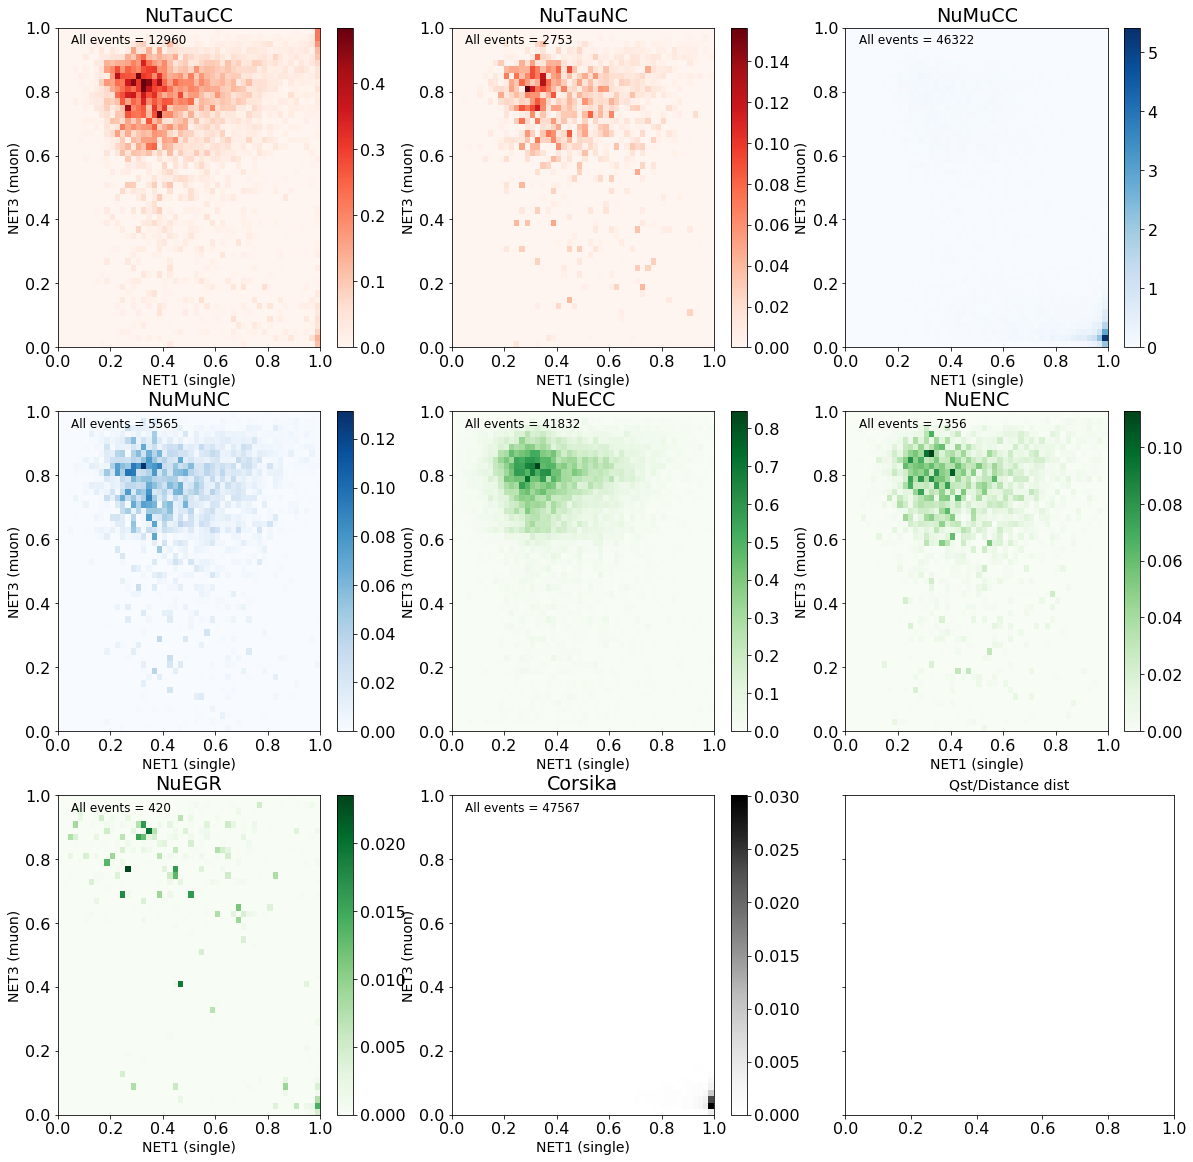

In [218]:
fig, ax = plt.subplots(nrows=3, ncols=3,sharex = True,sharey=True, figsize=(20,20))
plt.title('Qst/Distance dist', fontdict={'fontsize': 14, 'fontweight': 'medium'})

plt.subplot(3,3,1)
plt.gca().set_title('NuTauCC')
plt.hist2d(data_tc['preds']['pred_n1'], data_tc['preds']['pred_n3'][:,0], weights = data_tc['weight_val'], bins = 50, range = [[0,1],[0,1]] ,cmap = 'Reds')
plt.text(0.05,0.95,'All events = '+str(len(data_tc)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(3,3,2)
plt.gca().set_title('NuTauNC')
plt.hist2d(data_tn['preds']['pred_n1'], data_tn['preds']['pred_n3'][:,0], weights = data_tn['weight_val'], bins = 50, range = [[0,1],[0,1]] ,cmap = 'Reds')
plt.text(0.05,0.95,'All events = '+str(len(data_tn)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(3,3,3)
plt.gca().set_title('NuMuCC')
plt.hist2d(data_mc['preds']['pred_n1'], data_mc['preds']['pred_n3'][:,0], weights = data_mc['weight_val'], bins = 50, range = [[0,1],[0,1]],cmap = 'Blues')
plt.text(0.05,0.95,'All events = '+str(len(data_mc)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(3,3,4)
plt.gca().set_title('NuMuNC')
plt.hist2d(data_mn['preds']['pred_n1'], data_mn['preds']['pred_n3'][:,0], weights = data_mn['weight_val'], bins = 50, range = [[0,1],[0,1]] ,cmap = 'Blues')
plt.text(0.05,0.95,'All events = '+str(len(data_mn)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(3,3,5)
plt.gca().set_title('NuECC')
plt.hist2d(data_ec['preds']['pred_n1'], data_ec['preds']['pred_n3'][:,0], weights = data_ec['weight_val'], bins = 50, range = [[0,1],[0,1]],cmap = 'Greens')
plt.text(0.05,0.95,'All events = '+str(len(data_ec)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(3,3,6)
plt.gca().set_title('NuENC')
plt.hist2d(data_en['preds']['pred_n1'], data_en['preds']['pred_n3'][:,0], weights = data_en['weight_val'], bins = 50, range = [[0,1],[0,1]],cmap = 'Greens')
plt.text(0.05,0.95,'All events = '+str(len(data_en)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(3,3,7)
plt.gca().set_title('NuEGR')
plt.hist2d(data_eg['preds']['pred_n1'], data_eg['preds']['pred_n3'][:,0], weights = data_eg['weight_val'], bins = 50, range = [[0,1],[0,1]],cmap = 'Greens')
plt.text(0.05,0.95,'All events = '+str(len(data_eg)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(3,3,8)
plt.gca().set_title('Corsika')
plt.hist2d(data_c['preds']['pred_n1'], data_c['preds']['pred_n3'][:,0], weights = data_c['weight_val'], bins = 50, range = [[0,1],[0,1]],cmap = 'Greys')
plt.text(0.05,0.95,'All events = '+str(len(data_c)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.show()

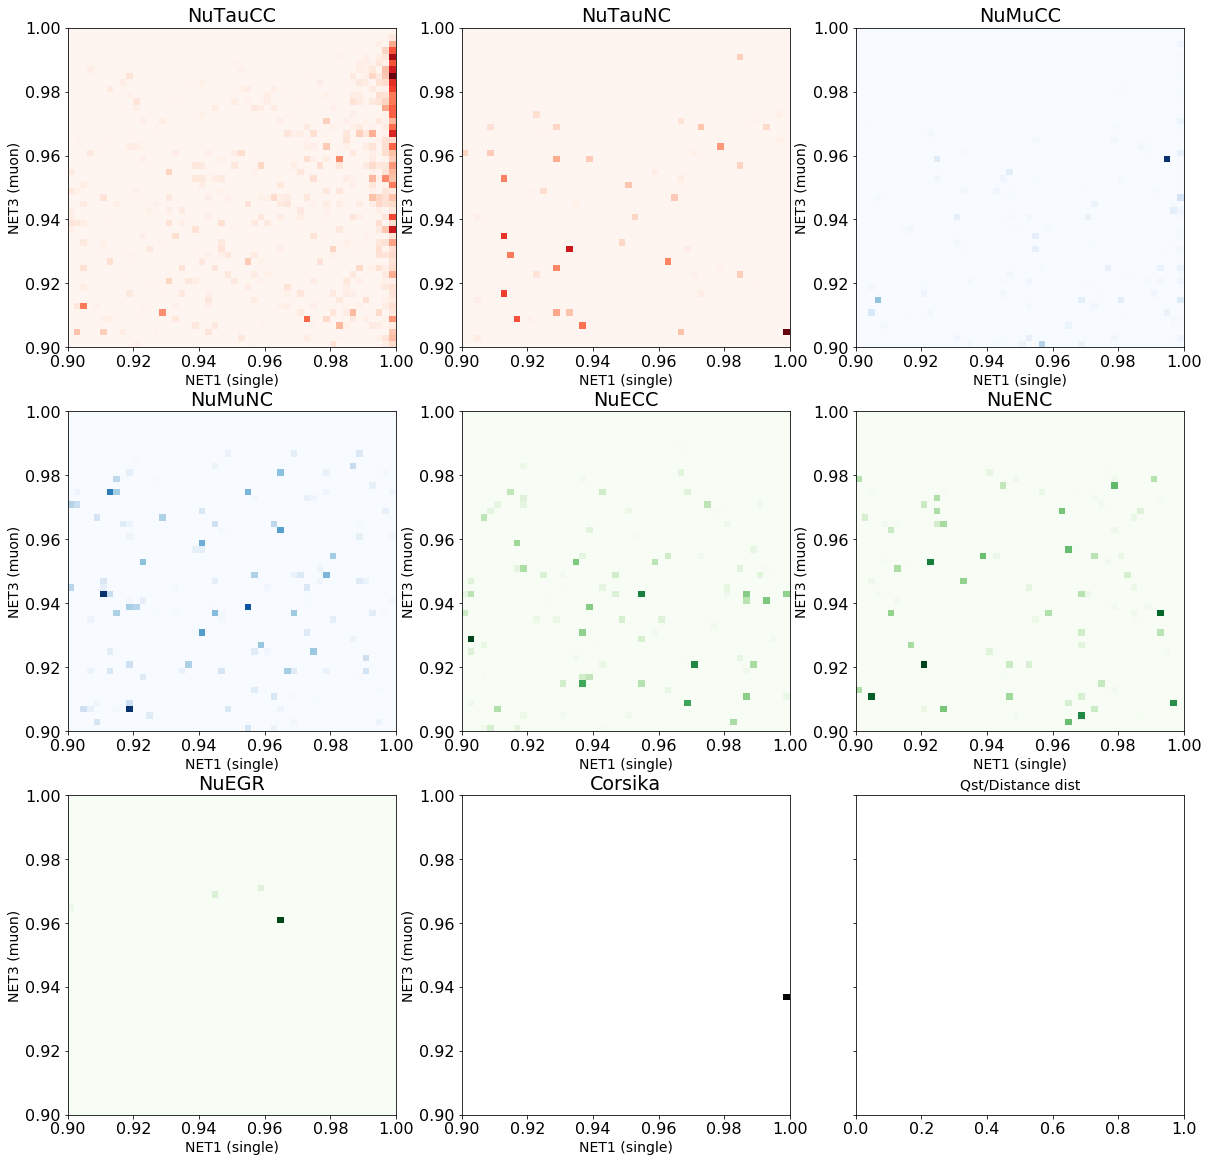

In [143]:
fig, ax = plt.subplots(nrows=3, ncols=3,sharex = True,sharey=True, figsize=(20,20))
plt.title('Qst/Distance dist', fontdict={'fontsize': 14, 'fontweight': 'medium'})
ran = [[0.90,1],[0.90,1]]
plt.subplot(3,3,1)
plt.gca().set_title('NuTauCC')
plt.hist2d(data_tc['preds']['pred_n1'], data_tc['preds']['pred_n3'][:,0], weights = data_tc['weight_val'], bins = 50, range = ran,cmap = 'Reds')
#plt.text(0.05,0.95,'All events = '+str(len(data_tc)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
#plt.colorbar()

plt.subplot(3,3,2)
plt.gca().set_title('NuTauNC')
plt.hist2d(data_tn['preds']['pred_n1'], data_tn['preds']['pred_n3'][:,0], weights = data_tn['weight_val'], bins = 50, range = ran,cmap = 'Reds')
#plt.text(0.05,0.95,'All events = '+str(len(data_tn)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
#plt.colorbar()

plt.subplot(3,3,3)
plt.gca().set_title('NuMuCC')
plt.hist2d(data_mc['preds']['pred_n1'], data_mc['preds']['pred_n3'][:,0], weights = data_mc['weight_val'], bins = 50, range =ran,cmap = 'Blues')
#plt.text(0.05,0.95,'All events = '+str(len(data_mc)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
#plt.colorbar()

plt.subplot(3,3,4)
plt.gca().set_title('NuMuNC')
plt.hist2d(data_mn['preds']['pred_n1'], data_mn['preds']['pred_n3'][:,0], weights = data_mn['weight_val'], bins = 50, range = ran ,cmap = 'Blues')
#plt.text(0.05,0.95,'All events = '+str(len(data_mn)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
#plt.colorbar()

plt.subplot(3,3,5)
plt.gca().set_title('NuECC')
plt.hist2d(data_ec['preds']['pred_n1'], data_ec['preds']['pred_n3'][:,0], weights = data_ec['weight_val'], bins = 50, range = ran,cmap = 'Greens')
#plt.text(0.05,0.95,'All events = '+str(len(data_ec)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
#plt.colorbar()

plt.subplot(3,3,6)
plt.gca().set_title('NuENC')
plt.hist2d(data_en['preds']['pred_n1'], data_en['preds']['pred_n3'][:,0], weights = data_en['weight_val'], bins = 50, range = ran,cmap = 'Greens')
#plt.text(0.05,0.95,'All events = '+str(len(data_en)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
#plt.colorbar()

plt.subplot(3,3,7)
plt.gca().set_title('NuEGR')
plt.hist2d(data_eg['preds']['pred_n1'], data_eg['preds']['pred_n3'][:,0], weights = data_eg['weight_val'], bins = 50, range = ran,cmap = 'Greens')
#plt.text(0.05,0.95,'All events = '+str(len(data_eg)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
#plt.colorbar()

plt.subplot(3,3,8)
plt.gca().set_title('Corsika')
plt.hist2d(data_c['preds']['pred_n1'], data_c['preds']['pred_n3'][:,0], weights = data_c['weight_val'], bins = 50, range = ran,cmap = 'Greys')
#plt.text(0.05,0.95,'All events = '+str(len(data_c)), color = "k",fontsize=12)
plt.xlabel("NET1 (single)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NET3 (muon)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
#plt.colorbar()

plt.show()

In [99]:
print(data_tc['preds']['pred_n1'].shape,data_tc['preds']['pred_n3'][:,0].shape)

(12960,) (12960,)


In [96]:
mask_tc = n1_mask_tc & n3_mask_tc & lmask_tc
mask_tn = n1_mask_tn & n3_mask_tn & lmask_tn
mask_mc = n1_mask_mc & n3_mask_mc & lmask_mc
mask_mn = n1_mask_mn & n3_mask_mn & lmask_mn
mask_ec = n1_mask_ec & n3_mask_ec & lmask_ec
mask_en = n1_mask_en & n3_mask_en & lmask_en
mask_eg = n1_mask_eg & n3_mask_eg & lmask_eg
mask_c = n1_mask_c & n3_mask_c & lmask_c

In [97]:
GetRates("Rates after Net1 and Net3",mask_tc,mask_tn,mask_mc,mask_mn,mask_ec,mask_en,mask_eg,mask_c)

Rates after Net1 and Net3
TauCC = 0.480 +/- 0.032
TauNC = 0.003 +/- 0.002
MuCC =  0.021 +/- 0.018
MuNC =  0.003 +/- 0.001
ECC =   0.003 +/- 0.002
ENC =   0.000 +/- 0.000
EGR =   0.000 +/- 0.000
Single = 0.009 +/- 0.004
Double = 0.480 +/- 0.032
Track =  0.021 +/- 0.018
Corsika =  0.000 +/- 0.000


In [637]:
data_2 = np.concatenate([data_ec['pred_m'],data_mc['pred_m'],data_en['pred_m'],data_eg['pred_m'],data_mn['pred_m'],data_tn['pred_m']],axis =0)
weight_2 = np.concatenate([data_ec['weight_val'],data_mc['weight_val'],data_en['weight_val'],data_eg['weight_val'],data_mn['weight_val'],data_tn['weight_val']],axis =0)

plot_data = ROCCurve(data_tc['pred_m'],data_2,data_tc['weight_val'],weight_2,cut_range=[0.7,1],step=0.001)

In [507]:
print([i for i in plot_data if 0.55>i[1]>0.5])

[array([0.958     , 0.54540539, 0.09676202, 0.03124223, 0.01204874]), array([0.959     , 0.53137881, 0.09471369, 0.03076308, 0.0120237 ]), array([0.96      , 0.52470481, 0.08183201, 0.03057193, 0.01046589]), array([0.961     , 0.50176656, 0.07845175, 0.02911255, 0.01017778])]


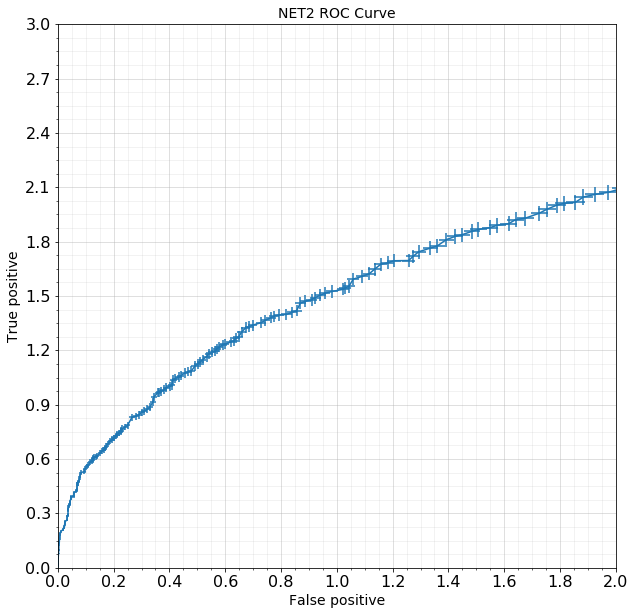

In [508]:
PlotROCCurve("NET2 ROC Curve",plot_data,lims=[0,2,0,3])    

/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


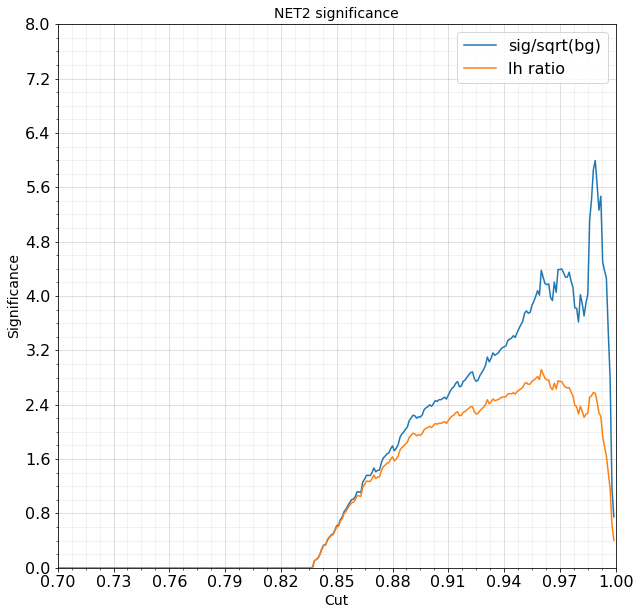

In [638]:
sig = Significance(plot_data)
PlotSig("NET2 significance",sig, lims = [0.7,1,0,8])

In [623]:
#Network2 score cut
n2_cut = 0.96 #n1_cut =0.99
n2_mask_tc= data_tc['pred_m'] >= n2_cut
n2_mask_tn= data_tn['pred_m'] >= n2_cut
n2_mask_mc= data_mc['pred_m'] >= n2_cut
n2_mask_mn= data_mn['pred_m'] >= n2_cut
n2_mask_ec= data_ec['pred_m'] >= n2_cut
n2_mask_en= data_en['pred_m'] >= n2_cut
n2_mask_eg= data_eg['pred_m'] >= n2_cut

In [624]:
GetRates("Rates after NET2 Score Cut of {0}".format(n2_cut),n2_mask_tc,n2_mask_tn,n2_mask_mc,n2_mask_mn,n2_mask_ec,n2_mask_en,n2_mask_eg)

Rates after NET2 Score Cut of 0.96
TauCC = 0.525 +/- 0.031
TauNC = 0.012 +/- 0.006
MuCC =  0.039 +/- 0.006
MuNC =  0.005 +/- 0.001
ECC =   0.014 +/- 0.004
ENC =   0.006 +/- 0.002
EGR =   0.006 +/- 0.005
Single = 0.042 +/- 0.018
Double = 0.525 +/- 0.031
Track =  0.039 +/- 0.006


In [517]:
ldata_tc = (data_tc['logan_veto']["SPE_rlogl"]-data_tc['logan_veto']["Cascade_rlogl"])
ldata_tn = (data_tn['logan_veto']["SPE_rlogl"]-data_tn['logan_veto']["Cascade_rlogl"])
ldata_mc = (data_mc['logan_veto']["SPE_rlogl"]-data_mc['logan_veto']["Cascade_rlogl"])
ldata_mn = (data_mn['logan_veto']["SPE_rlogl"]-data_mn['logan_veto']["Cascade_rlogl"])
ldata_ec = (data_ec['logan_veto']["SPE_rlogl"]-data_ec['logan_veto']["Cascade_rlogl"])
ldata_en = (data_en['logan_veto']["SPE_rlogl"]-data_en['logan_veto']["Cascade_rlogl"])
ldata_eg = (data_eg['logan_veto']["SPE_rlogl"]-data_eg['logan_veto']["Cascade_rlogl"])
ldata_c = (data_c['logan_veto']["SPE_rlogl"]-data_c['logan_veto']["Cascade_rlogl"])

plot_data = ROCCurve(ldata_tc,ldata_mc,data_tc['weight_val'],data_mc['weight_val'],cut_range=[-2,0.5],step=0.01)

In [522]:
print([i for i in plot_data if 63>i[1]>60])

[array([5.00000000e-02, 6.29755859e+01, 1.51735992e+01, 1.07351613e+00,
       3.46963942e-01]), array([6.00000000e-02, 6.26531372e+01, 1.49342079e+01, 1.07149148e+00,
       3.44730943e-01]), array([ 0.07      , 62.08628845, 14.5070715 ,  1.06565559,  0.3389385 ]), array([ 0.08      , 61.59539032, 14.17602539,  1.06254184,  0.33478963]), array([ 0.09      , 61.04701233, 13.87077522,  1.05783868,  0.33191401]), array([ 0.1       , 60.01814651, 13.46017075,  1.04807174,  0.32712352])]


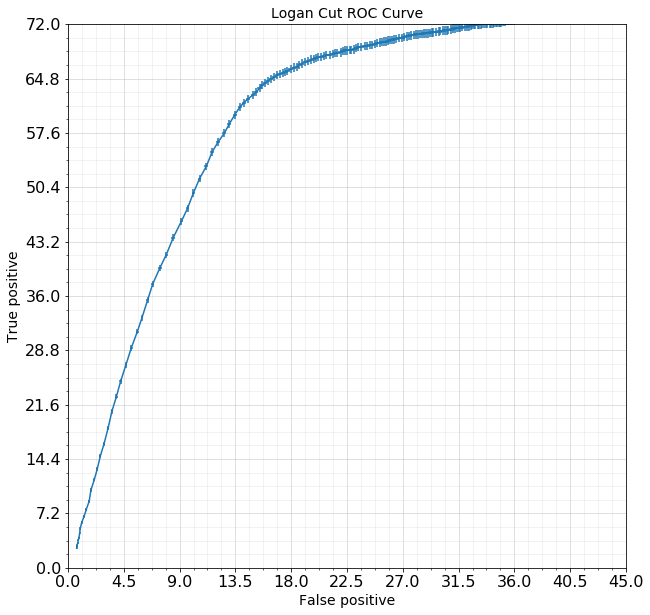

In [519]:
PlotROCCurve("Logan Cut ROC Curve",plot_data,lims=[0,45,0,72])    

/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [524]:
GetRates("Rates after Logan's LLH Cut of {0}".format(lcut),lmask_tc,lmask_tn,lmask_mc,lmask_mn,lmask_ec,lmask_en,lmask_eg)

Rates after Logan's LLH Cut of 0.1
TauCC = 60.018 +/- 1.048
TauNC = 0.070 +/- 0.018
MuCC =  13.460 +/- 0.327
MuNC =  11.740 +/- 0.316
ECC =   93.565 +/- 0.903
ENC =   11.333 +/- 0.291
EGR =   0.343 +/- 0.054
Single = 117.051 +/- 1.583
Double = 60.018 +/- 1.048
Track =  13.460 +/- 0.327


In [639]:
data_2 = np.concatenate([data_ec['pred_mc'][lmask_ec],data_mc['pred_mc'][lmask_mc],data_en['pred_mc'][lmask_en],\
                         data_eg['pred_mc'][lmask_eg],data_mn['pred_mc'][lmask_mn],data_tn['pred_mc'][lmask_tn]],axis =0)
weight_2 = np.concatenate([data_ec['weight_val'][lmask_ec],data_mc['weight_val'][lmask_mc],data_en['weight_val'][lmask_en],\
                           data_eg['weight_val'][lmask_eg],data_mn['weight_val'][lmask_mn],data_tn['weight_val'][lmask_tn]],axis =0)

plot_data = ROCCurve(data_tc['pred_mc'][lmask_tc],data_2,data_tc['weight_val'][lmask_tc],weight_2,cut_range=[0.7,1],step=0.001)

In [551]:
print([i for i in plot_data if 0.45>i[1]>0.4])

[array([0.813     , 0.44511926, 0.1855408 , 0.04203625, 0.02640892]), array([0.814     , 0.4408491 , 0.17902   , 0.04190376, 0.02622243]), array([0.815     , 0.4408491 , 0.17782569, 0.04190376, 0.02621309]), array([0.816     , 0.43651778, 0.17519486, 0.04178943, 0.02617295]), array([0.817     , 0.43172181, 0.16897237, 0.04170601, 0.02596539]), array([0.818     , 0.42967546, 0.16643804, 0.04168865, 0.02592714]), array([0.819     , 0.42583051, 0.16056432, 0.0415996 , 0.02568365]), array([0.82      , 0.42009002, 0.15707639, 0.04126529, 0.02561554]), array([0.821     , 0.41873473, 0.15663978, 0.04125762, 0.02561182]), array([0.822     , 0.41865116, 0.15272705, 0.04125754, 0.02548517]), array([0.823     , 0.41822293, 0.15016973, 0.04125672, 0.02543805]), array([0.824     , 0.41682824, 0.14982133, 0.04123314, 0.02543566]), array([0.825     , 0.41619217, 0.13455825, 0.04123053, 0.02116749]), array([0.826     , 0.41575509, 0.13210845, 0.04122822, 0.0210843 ]), array([0.827     , 0.41140872, 0.

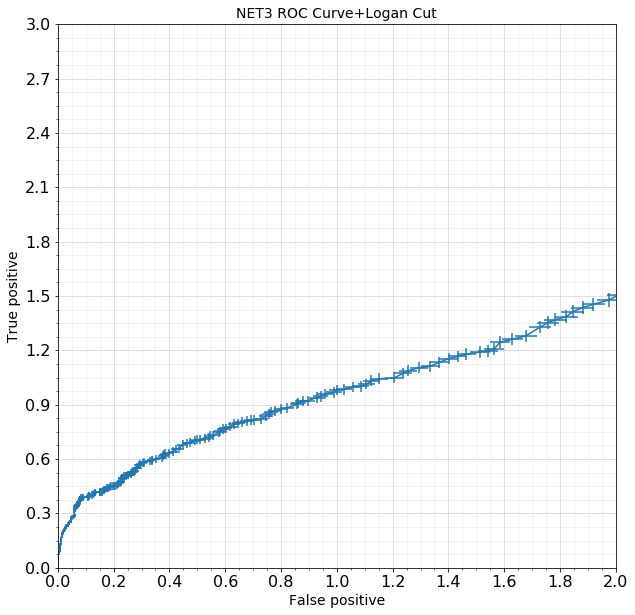

In [627]:
PlotROCCurve("NET3 ROC Curve+Logan Cut",plot_data,lims=[0,2,0,3])    

/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


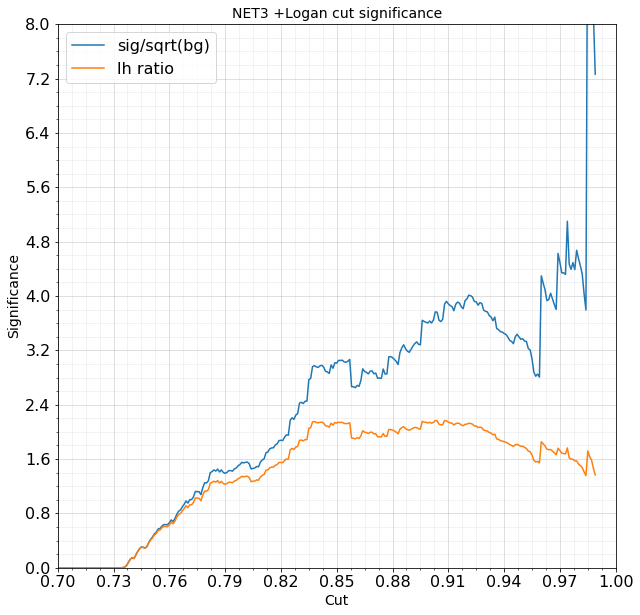

In [640]:
sig = Significance(plot_data)
PlotSig("NET3 +Logan cut significance",sig, lims = [0.7,1,0,8])

In [528]:
#Network3 score cut
n3_cut = 0.82 #n1_cut =0.99
n3_mask_tc= data_tc['pred_mc'] >= n3_cut
n3_mask_tn= data_tn['pred_mc'] >= n3_cut
n3_mask_mc= data_mc['pred_mc'] >= n3_cut
n3_mask_mn= data_mn['pred_mc'] >= n3_cut
n3_mask_ec= data_ec['pred_mc'] >= n3_cut
n3_mask_en= data_en['pred_mc'] >= n3_cut
n3_mask_eg= data_eg['pred_mc'] >= n3_cut

In [529]:
GetRates("Rates after NET2 Score Cut of {0}".format(n3_cut),n3_mask_tc,n3_mask_tn,n3_mask_mc,n3_mask_mn,n3_mask_ec,n3_mask_en,n3_mask_eg)

Rates after NET2 Score Cut of 0.82
TauCC = 0.501 +/- 0.042
TauNC = 0.070 +/- 0.018
MuCC =  0.279 +/- 0.020
MuNC =  0.014 +/- 0.003
ECC =   0.081 +/- 0.015
ENC =   0.031 +/- 0.014
EGR =   0.016 +/- 0.007
Single = 0.212 +/- 0.057
Double = 0.501 +/- 0.042
Track =  0.279 +/- 0.020


In [537]:
mask_tc = lmask_tc & n3_mask_tc
mask_tn = lmask_tn & n3_mask_tn
mask_mc = lmask_mc & n3_mask_mc
mask_mn = lmask_mn & n3_mask_mn
mask_ec = lmask_ec & n3_mask_ec
mask_en = lmask_en & n3_mask_en
mask_eg = lmask_eg & n3_mask_eg

In [538]:
GetRates("Rates after Net3 and Logan' cut",mask_tc,mask_tn,mask_mc,mask_mn,mask_ec,mask_en,mask_eg)

Rates after Net3 and Logan' cut
TauCC = 0.420 +/- 0.041
TauNC = 0.023 +/- 0.014
MuCC =  0.010 +/- 0.002
MuNC =  0.012 +/- 0.003
ECC =   0.074 +/- 0.014
ENC =   0.029 +/- 0.014
EGR =   0.009 +/- 0.006
Single = 0.147 +/- 0.052
Double = 0.420 +/- 0.041
Track =  0.010 +/- 0.002


In [641]:
data_2 = np.concatenate([data_ec['pred'][lmask_ec],data_mc['pred'][lmask_mc],data_en['pred'][lmask_en],\
                         data_eg['pred'][lmask_eg],data_mn['pred'][lmask_mn],data_tn['pred'][lmask_tn]],axis =0)
weight_2 = np.concatenate([data_ec['weight_val'][lmask_ec],data_mc['weight_val'][lmask_mc],data_en['weight_val'][lmask_en],\
                           data_eg['weight_val'][lmask_eg],data_mn['weight_val'][lmask_mn],data_tn['weight_val'][lmask_tn]],axis =0)

plot_data = ROCCurve(data_tc['pred'][lmask_tc],data_2,data_tc['weight_val'][lmask_tc],weight_2,cut_range=[0.7,1],step=0.001)

/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


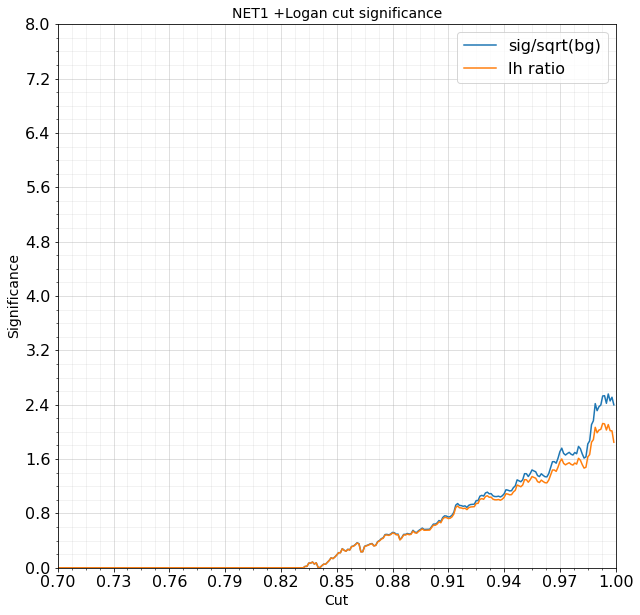

In [642]:
sig = Significance(plot_data)
PlotSig("NET1 +Logan cut significance",sig, lims = [0.7,1,0,8])

In [533]:
mask_tc = lmask_tc & n1_mask_tc
mask_tn = lmask_tn & n1_mask_tn
mask_mc = lmask_mc & n1_mask_mc
mask_mn = lmask_mn & n1_mask_mn
mask_ec = lmask_ec & n1_mask_ec
mask_en = lmask_en & n1_mask_en
mask_eg = lmask_eg & n1_mask_eg

In [534]:
GetRates("Rates after Net1 and Logan' cut",mask_tc,mask_tn,mask_mc,mask_mn,mask_ec,mask_en,mask_eg)

Rates after Net1 and Logan' cut
TauCC = 1.408 +/- 0.073
TauNC = 0.022 +/- 0.007
MuCC =  0.664 +/- 0.060
MuNC =  0.034 +/- 0.008
ECC =   0.103 +/- 0.021
ENC =   0.026 +/- 0.006
EGR =   0.002 +/- 0.001
Single = 0.187 +/- 0.043
Double = 1.408 +/- 0.073
Track =  0.664 +/- 0.060


In [643]:
data_2 = np.concatenate([data_ec['pred_m'][lmask_ec],data_mc['pred_m'][lmask_mc],data_en['pred_m'][lmask_en],\
                         data_eg['pred_m'][lmask_eg],data_mn['pred_m'][lmask_mn],data_tn['pred_m'][lmask_tn]],axis =0)
weight_2 = np.concatenate([data_ec['weight_val'][lmask_ec],data_mc['weight_val'][lmask_mc],data_en['weight_val'][lmask_en],\
                           data_eg['weight_val'][lmask_eg],data_mn['weight_val'][lmask_mn],data_tn['weight_val'][lmask_tn]],axis =0)

plot_data = ROCCurve(data_tc['pred_m'][lmask_tc],data_2,data_tc['weight_val'][lmask_tc],weight_2,cut_range=[0.7,1],step=0.001)

/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


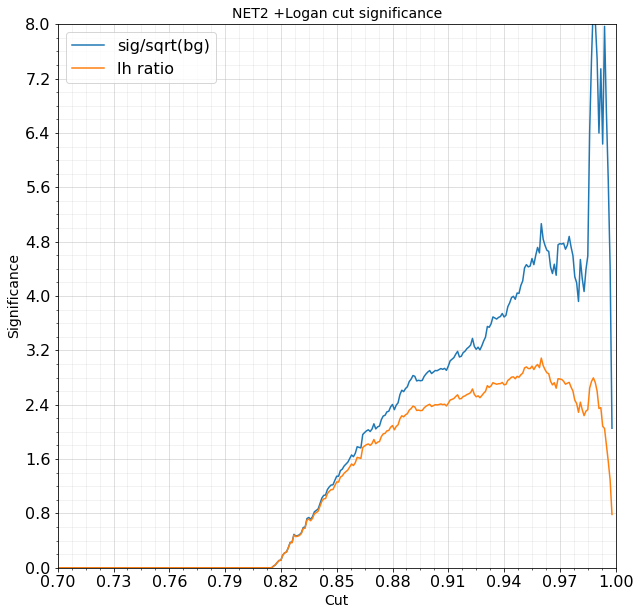

In [644]:
sig = Significance(plot_data)
PlotSig("NET2 +Logan cut significance",sig, lims = [0.7,1,0,8])

In [539]:
mask_tc = lmask_tc & n2_mask_tc
mask_tn = lmask_tn & n2_mask_tn
mask_mc = lmask_mc & n2_mask_mc
mask_mn = lmask_mn & n2_mask_mn
mask_ec = lmask_ec & n2_mask_ec
mask_en = lmask_en & n2_mask_en
mask_eg = lmask_eg & n2_mask_eg

In [540]:
GetRates("Rates after Net2 and Logan' cut",mask_tc,mask_tn,mask_mc,mask_mn,mask_ec,mask_en,mask_eg)

Rates after Net2 and Logan' cut
TauCC = 0.460 +/- 0.029
TauNC = 0.012 +/- 0.006
MuCC =  0.011 +/- 0.003
MuNC =  0.005 +/- 0.001
ECC =   0.013 +/- 0.004
ENC =   0.006 +/- 0.002
EGR =   0.006 +/- 0.005
Single = 0.041 +/- 0.018
Double = 0.460 +/- 0.029
Track =  0.011 +/- 0.003


In [567]:
data_b = np.concatenate([data_ec['pred'][lmask_ec],data_mc['pred'][lmask_mc],data_en['pred'][lmask_en],\
                         data_eg['pred'][lmask_eg],data_mn['pred'][lmask_mn],data_tn['pred'][lmask_tn]],axis =0)
weight_b = np.concatenate([data_ec['weight_val'][lmask_ec],data_mc['weight_val'][lmask_mc],data_en['weight_val'][lmask_en],\
                           data_eg['weight_val'][lmask_eg],data_mn['weight_val'][lmask_mn],data_tn['weight_val'][lmask_tn]],axis =0)
data_b2 = np.concatenate([data_ec['pred_m'][lmask_ec],data_mc['pred_m'][lmask_mc],data_en['pred_m'][lmask_en],\
                         data_eg['pred_m'][lmask_eg],data_mn['pred_m'][lmask_mn],data_tn['pred_m'][lmask_tn]],axis =0)
plot_data = ROCCurve2(data_tc['pred'][lmask_tc],data_b,data_tc['pred_m'][lmask_tc],data_b2,data_tc['weight_val'][lmask_tc],weight_b,cut_range=[0.7,1],step=0.01)


In [566]:
print(plot_data)

[[list([0.7, 0.7]) 1757.0408 2109.5647 39.682556 41.8333]
 [list([0.7, 0.71]) 1721.7877 2047.4802 39.36813 41.306458]
 [list([0.7, 0.72]) 1698.1792 1990.9742 39.153027 40.81429]
 ...
 [list([1.0000000000000002, 0.9800000000000002]) 0.0 0.0 0.0 0.0]
 [list([1.0000000000000002, 0.9900000000000002]) 0.0 0.0 0.0 0.0]
 [list([1.0000000000000002, 1.0000000000000002]) 0.0 0.0 0.0 0.0]]


In [557]:
print([i for i in plot_data if 0.45>i[1]>0.4])

[]


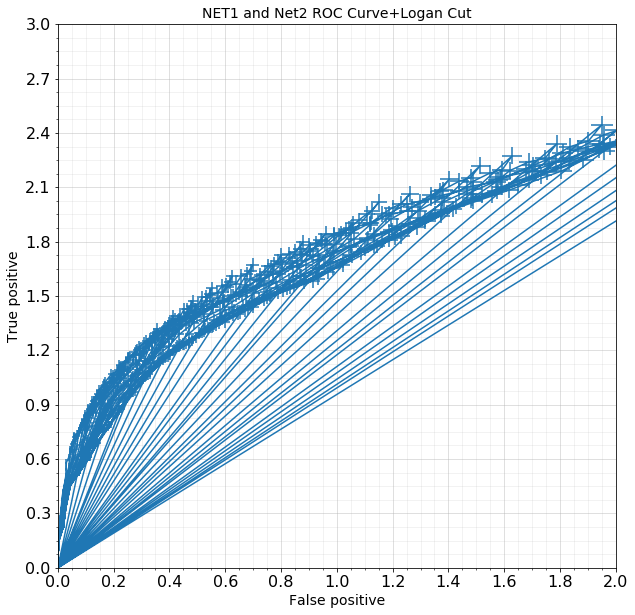

In [569]:
PlotROCCurve("NET1 and Net2 ROC Curve+Logan Cut",plot_data,lims=[0,2,0,3])    

In [542]:
zdata_tc = (data_tc['logan_veto']["FirstHitZ"])
zdata_tn = (data_tn['logan_veto']["FirstHitZ"])
zdata_mc = (data_mc['logan_veto']["FirstHitZ"])
zdata_mn = (data_mn['logan_veto']["FirstHitZ"])
zdata_ec = (data_ec['logan_veto']["FirstHitZ"])
zdata_en = (data_en['logan_veto']["FirstHitZ"])
zdata_eg = (data_eg['logan_veto']["FirstHitZ"])

plot_data = ROCCurve(zdata_tc,zdata_mc,data_tc['weight_val'],data_mc['weight_val'],cut_range=[400,600],step=1, sign ="less")

In [522]:
print([i for i in plot_data if 63>i[1]>60])

[array([5.00000000e-02, 6.29755859e+01, 1.51735992e+01, 1.07351613e+00,
       3.46963942e-01]), array([6.00000000e-02, 6.26531372e+01, 1.49342079e+01, 1.07149148e+00,
       3.44730943e-01]), array([ 0.07      , 62.08628845, 14.5070715 ,  1.06565559,  0.3389385 ]), array([ 0.08      , 61.59539032, 14.17602539,  1.06254184,  0.33478963]), array([ 0.09      , 61.04701233, 13.87077522,  1.05783868,  0.33191401]), array([ 0.1       , 60.01814651, 13.46017075,  1.04807174,  0.32712352])]


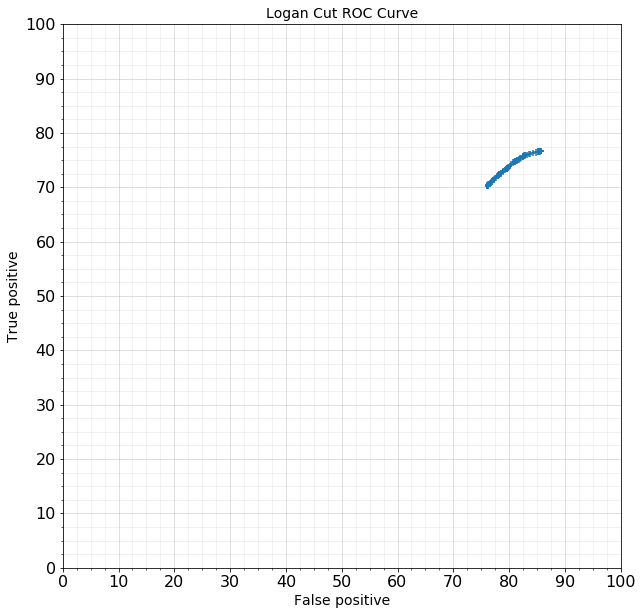

In [543]:
PlotROCCurve("Logan Cut ROC Curve",plot_data,lims=[0,100,0,100])    

In [327]:
#first z hit cut
zcut = 475
zmask_tc = data_tc['logan_veto']["FirstHitZ"]<zcut
zmask_tn = data_tn['logan_veto']["FirstHitZ"]<zcut
zmask_mc = data_mc['logan_veto']["FirstHitZ"]<zcut
zmask_mn = data_mn['logan_veto']["FirstHitZ"]<zcut
zmask_ec = data_ec['logan_veto']["FirstHitZ"]<zcut
zmask_en = data_en['logan_veto']["FirstHitZ"]<zcut
zmask_eg = data_eg['logan_veto']["FirstHitZ"]<zcut

In [328]:
GetRates("Rates after Z Pos Cut of {0}".format(zcut),zmask_tc,zmask_tn,zmask_mc,zmask_mn,zmask_ec,zmask_en,zmask_eg)

Rates after Z Pos Cut of 475
TauCC = 74.749 +/- 1.174
TauNC = 0.006 +/- 0.005
MuCC =  81.079 +/- 0.790
MuNC =  13.797 +/- 0.346
ECC =   108.742 +/- 0.977
ENC =   13.183 +/- 0.313
EGR =   0.560 +/- 0.064
Single = 136.287 +/- 1.706
Double = 74.749 +/- 1.174
Track =  81.079 +/- 0.790


In [88]:
print(np.sum(data_tc['hese']['vheselfveto'] == 0)/data_tc.shape[0])
print(np.sum(data_tc['hese_old']['vheselfveto'] == 0)/data_tc.shape[0])

0.35424382716049385
0.23950617283950618


In [308]:
#HESE veto
hcut = False
hmask_tc= data_tc['hese']['vheselfveto'] == hcut
hmask_tn= data_tn['hese']['vheselfveto'] == hcut
hmask_mc= data_mc['hese']['vheselfveto'] == hcut
hmask_mn= data_mn['hese']['vheselfveto'] == hcut
hmask_ec= data_ec['hese']['vheselfveto'] == hcut
hmask_en= data_en['hese']['vheselfveto'] == hcut
hmask_eg= data_eg['hese']['vheselfveto'] == hcut

In [329]:
GetRates("Rates after HESE veto of {0}".format(hcut),hmask_tc,hmask_tn,hmask_mc,hmask_mn,hmask_ec,hmask_en,hmask_eg)

Rates after HESE veto of False
TauCC = 34.508 +/- 0.828
TauNC = 0.006 +/- 0.005
MuCC =  23.555 +/- 0.470
MuNC =  6.725 +/- 0.249
ECC =   48.690 +/- 0.676
ENC =   6.329 +/- 0.222
EGR =   0.179 +/- 0.041
Single = 61.928 +/- 1.193
Double = 34.508 +/- 0.828
Track =  23.555 +/- 0.470


In [310]:
#Max charge string dist cut
dcut = 300
dmask_tc= np.array([sum(np.sqrt(i[:N])) for i in data_tc['qst_all']['dist']]) < dcut
dmask_tn= np.array([sum(np.sqrt(i[:N])) for i in data_tn['qst_all']['dist']]) < dcut
dmask_mc= np.array([sum(np.sqrt(i[:N])) for i in data_mc['qst_all']['dist']]) < dcut
dmask_mn= np.array([sum(np.sqrt(i[:N])) for i in data_mn['qst_all']['dist']]) < dcut
dmask_ec= np.array([sum(np.sqrt(i[:N])) for i in data_ec['qst_all']['dist']]) < dcut
dmask_en= np.array([sum(np.sqrt(i[:N])) for i in data_en['qst_all']['dist']]) < dcut
dmask_eg= np.array([sum(np.sqrt(i[:N])) for i in data_eg['qst_all']['dist']]) < dcut

In [330]:
GetRates("Rates after Max string dist cut of {0}".format(dcut),dmask_tc,dmask_tn,dmask_mc,dmask_mn,dmask_ec,dmask_en,dmask_eg)

Rates after Max string dist cut of 300
TauCC = 71.893 +/- 1.143
TauNC = 0.006 +/- 0.005
MuCC =  52.126 +/- 0.646
MuNC =  13.306 +/- 0.336
ECC =   107.291 +/- 0.964
ENC =   12.882 +/- 0.308
EGR =   0.569 +/- 0.066
Single = 134.053 +/- 1.679
Double = 71.893 +/- 1.143
Track =  52.126 +/- 0.646


In [332]:
#Qst>=2000 cut
qcut = 2000
qmask_tc = (data_tc['qst']['q'][:,0] >= qcut)
qmask_tn = (data_tn['qst']['q'][:,0] >= qcut)
qmask_mc = (data_mc['qst']['q'][:,0] >= qcut)
qmask_mn = (data_mn['qst']['q'][:,0] >= qcut)
qmask_ec = (data_ec['qst']['q'][:,0] >= qcut)
qmask_en = (data_en['qst']['q'][:,0] >= qcut)
qmask_eg = (data_eg['qst']['q'][:,0] >= qcut)

In [333]:
GetRates("Rates after QSt Cut of {0}".format(qcut),qmask_tc,qmask_tn,qmask_mc,qmask_mn,qmask_ec,qmask_en,qmask_eg)

Rates after QSt Cut of 2000
TauCC = 24.562 +/- 0.617
TauNC = 0.006 +/- 0.005
MuCC =  18.678 +/- 0.336
MuNC =  4.036 +/- 0.172
ECC =   38.225 +/- 0.534
ENC =   3.980 +/- 0.157
EGR =   0.375 +/- 0.047
Single = 46.622 +/- 0.915
Double = 24.562 +/- 0.617
Track =  18.678 +/- 0.336


In [336]:
mask_tc = hmask_tc & lmask_tc & dmask_tc
mask_tn = hmask_tn & lmask_tn & dmask_tn
mask_mc = hmask_mc & lmask_mc & dmask_mc
mask_mn = hmask_mn & lmask_mn & dmask_mn
mask_ec = hmask_ec & lmask_ec & dmask_ec
mask_en = hmask_en & lmask_en & dmask_en
mask_eg = hmask_eg & lmask_eg & dmask_eg

In [337]:
GetRates("Rates after Combined cut",mask_tc,mask_tn,mask_mc,mask_mn,mask_ec,mask_en,mask_eg)

Rates after Combined cut
TauCC = 31.402 +/- 0.786
TauNC = 6.440 +/- 0.341
MuCC =  10.827 +/- 0.316
MuNC =  6.286 +/- 0.238
ECC =   45.882 +/- 0.650
ENC =   5.999 +/- 0.215
EGR =   0.161 +/- 0.037
Single = 64.768 +/- 1.482
Double = 31.402 +/- 0.786
Track =  10.827 +/- 0.316


In [350]:
mask_tc = hmask_tc & lmask_tc & dmask_tc & n1_mask_tc
mask_tn = hmask_tn & lmask_tn & dmask_tn & n1_mask_tn
mask_mc = hmask_mc & lmask_mc & dmask_mc & n1_mask_mc
mask_mn = hmask_mn & lmask_mn & dmask_mn & n1_mask_mn
mask_ec = hmask_ec & lmask_ec & dmask_ec & n1_mask_ec
mask_en = hmask_en & lmask_en & dmask_en & n1_mask_en
mask_eg = hmask_eg & lmask_eg & dmask_eg & n1_mask_eg

In [351]:
GetRates("Rates after Combined cut",mask_tc,mask_tn,mask_mc,mask_mn,mask_ec,mask_en,mask_eg)

Rates after Combined cut
TauCC = 1.670 +/- 0.098
TauNC = 0.153 +/- 0.034
MuCC =  1.535 +/- 0.108
MuNC =  0.137 +/- 0.017
ECC =   0.440 +/- 0.045
ENC =   0.162 +/- 0.022
EGR =   0.009 +/- 0.004
Single = 0.901 +/- 0.123
Double = 1.670 +/- 0.098
Track =  1.535 +/- 0.108


In [350]:
mask_tc = hmask_tc & lmask_tc & dmask_tc & n1_mask_tc
mask_tn = hmask_tn & lmask_tn & dmask_tn & n1_mask_tn
mask_mc = hmask_mc & lmask_mc & dmask_mc & n1_mask_mc
mask_mn = hmask_mn & lmask_mn & dmask_mn & n1_mask_mn
mask_ec = hmask_ec & lmask_ec & dmask_ec & n1_mask_ec
mask_en = hmask_en & lmask_en & dmask_en & n1_mask_en
mask_eg = hmask_eg & lmask_eg & dmask_eg & n1_mask_eg

In [351]:
GetRates("Rates after Combined cut",mask_tc,mask_tn,mask_mc,mask_mn,mask_ec,mask_en,mask_eg)

Rates after Combined cut
TauCC = 1.670 +/- 0.098
TauNC = 0.153 +/- 0.034
MuCC =  1.535 +/- 0.108
MuNC =  0.137 +/- 0.017
ECC =   0.440 +/- 0.045
ENC =   0.162 +/- 0.022
EGR =   0.009 +/- 0.004
Single = 0.901 +/- 0.123
Double = 1.670 +/- 0.098
Track =  1.535 +/- 0.108


In [664]:
n =10
arr =np.array([[1,0,0]]*n + [[0,1,0]]*n + [[0,0,1]]*n)
print(arr)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]]
